#### Business Analytics Term project

# **Exploratory Data Analysis with ERP Beverage Dataset**

In [1]:
# import necessary libraries (Pandas , Numpy , matplotlib , scikit-learn, seaborn  )
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
import seaborn as sns
# import warnings
# warnings.filterwarnings('ignore')

In [2]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [3]:
# geo_data = pd.read_csv("world_cities_with_coordinates.csv")
# geo_data["City"] = geo_data["City"].str.capitalize()
# geo_data

## 1. **Acquire the Data**

1. Download the dataset file.

2. Unzip it if necessary.

For Mac, go to terminal and type 
```unzip yourfilename.zip```

For windows, can also use third party software.

## 2. **Load the Data**
There are two way to import datasets. 
1. Upload the dataset folder in your Google drive and run the notebook with Google colab.
2. Download the dataset folder in one's device and access through local interactive computational environment. (Vscode jupyter, Jupyterlab, Jupyer Notebook)

In [7]:
# Firstly store "ERP_Beverage_Data_Medium" file in Your Google Drive to run the following code block
# connect with google drive (to get data from google drive)
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
# get each csv file and assign it in the variable
# variable_name = call pandas read_csv function ("file/paths/file.csv")
customer = pd.read_csv("./ERP_Beverage_Data_Medium/CustomerMaster.csv")
inventory = pd.read_csv("./ERP_Beverage_Data_Medium/InventoryBalances.csv")
product = pd.read_csv("./ERP_Beverage_Data_Medium/ProductMaster.csv")
pline = pd.read_csv("./ERP_Beverage_Data_Medium/ProductionLineMaster.csv")
porder = pd.read_csv("./ERP_Beverage_Data_Medium/ProductionOrders.csv")
sales = pd.read_csv("./ERP_Beverage_Data_Medium/SalesOrders.csv")
supplier = pd.read_csv("./ERP_Beverage_Data_Medium/SupplierMaster.csv")
wh = pd.read_csv("./ERP_Beverage_Data_Medium/WarehouseMaster.csv")

In [7]:
# in variable called dataframe : assign dictionary {} ,
#include {"key": value} where key is the name of dataframe and value is the dataframe table

dataframes = {"Customer":customer,
              "Inventory":inventory,"Product":product,"Product Line":pline,"Pruduct Order":porder,
              "Sales":sales,"Supplier":supplier,"Warehouse":wh}

In [9]:
#shape return (rows,columns)
for name,df in dataframes.items():
    print(f"{name} : {df.shape}", end='\n\n')

Customer : (500, 5)

Inventory : (15000, 6)

Product : (25, 5)

Product Line : (10, 4)

Pruduct Order : (5000, 7)

Sales : (25000, 7)

Supplier : (100, 5)

Warehouse : (15, 4)



### **Data Fields**

---

##### **1. CustomerMaster.csv**
- **Columns**: CustomerID, CustomerName, CustomerCity, CustomerCountry, PaymentTerms  
- **Number of Columns**: 5
- **Number of Rows**: 500
- **Features**:  
  - 1 Numeric (meta): CustomerID (Primary Key)
  - 4 Categorical: CustomerName, CustomerCity, CustomerCountry, PaymentTerms  

---

##### **2. InventoryBalances.csv**
- **Columns**: InventoryID, WarehouseID, ProductID, OnHand, OnOrder, LastUpdated  
- **Number of Columns**: 6
- **Number of Rows**: 15000
- **Features**:
  - 3 Numeric (meta): InventoryID (Primary Key) , WarehouseID (Foreign Key) , ProductID (Foreign Key)
  - 2 Numeric: OnHand, OnOrder
  - 1 Date: LastUpdated  

---

##### **3. ProductMaster.csv**
- **Columns**: ProductID, ProductName, ProductCategory, UnitOfMeasure, BasePrice  
- **Number of Columns**: 5
- **Number of Rows**: 25
- **Features**:  
  - 1 Numeric (meta): ProductID (Primary Key)
  - 1 Numeric: BasePrice  
  - 3 Categorical: ProductName, ProductCategory, UnitOfMeasure  

---

##### **4. ProductionLineMaster.csv**
- **Columns**: ProductionLineID, LineName, FacilityLocation, MaxCapacity  
- **Number of Columns**: 4
- **Number of Rows**: 10
- **Features**:  
  - 2 Numeric (meta): ProductionLineID (Primary Key)
  - 1 Numeric: MaxCapacity  
  - 2 Categorical: LineName, FacilityLocation  

---

##### **5. ProductionOrders.csv**
- **Columns**: ProductionOrderID, ProductionLineID, ProductID, ProductionDate, BatchSize, UnitCost, TotalProductionCost  
- **Number of Columns**: 7
- **Number of Rows**: 5000
- **Features**:  
  - 3 Numeric (meta): ProductionOrderID, ProductionLineID, ProductID
  - 3 Numeric: BatchSize, UnitCost, TotalProductionCost  
  - 1 Date: ProductionDate  

---

##### **6. SalesOrders.csv**
- **Columns**: SalesOrderID, OrderDate, CustomerID, ProductID, Quantity, UnitPrice, TotalAmount  
- **Number of Columns**: 7
- **Number of Rows**: 25000
- **Features**:  
  - 3 Numeric (meta): SalesOrderID (Primary Key) , CustomerID (Foreign Key) , ProductID (Foreign Key)
  - 3 Numeric: Quantity, UnitPrice, TotalAmount  
  - 1 Date: OrderDate  

---

##### **7. SupplierMaster.csv**
- **Columns**: SupplierID, SupplierName, SupplierCity, SupplierCountry, PaymentTerms  
- **Number of Columns**: 5
- **Number of Rows**: 100 
- **Features**:  
  - 1 Numeric (meta): SupplierID (Primary Key)
  - 4 Categorical: SupplierName, SupplierCity, SupplierCountry, PaymentTerms  

---

##### **8. WarehouseMaster.csv**
- **Columns**: WarehouseID, WarehouseName, Location, Capacity  
- **Number of Columns**: 4
- **Number of Rows**: 15
- **Features**:  
  - 1 Numeric (meta): WarehouseID (Primary Key)
  - 1 Numeric: Capacity  
  - 2 Categorical: WarehouseName, Location  



In [12]:
#for a quick view for each table use .head()

for name,df in dataframes.items():
  print(f"{name}\n{df.head()}", end='\n\n')

Customer
   CustomerID                 CustomerName       CustomerCity CustomerCountry  \
0        2001                 Callahan Inc     Gilbertchester          Mexico   
1        2002  Aguirre, Baxter and Hopkins    East Nancymouth           Japan   
2        2003                Mcbride-Kelly       Timothymouth       Australia   
3        2004                   Oliver Inc  West Michelleland           Italy   
4        2005                Morrison-King           Boydfort              UK   

  PaymentTerms  
0        NET45  
1          COD  
2          COD  
3          COD  
4          EOM  

Inventory
   InventoryID  WarehouseID  ProductID  OnHand  OnOrder LastUpdated
0        30001         5010       1016    8279     2368  2025-11-26
1        30002         5007       1004   10829     2365  2025-02-20
2        30003         5009       1006    9405     2737  2025-03-01
3        30004         5010       1003   13334     2006  2025-04-14
4        30005         5003       1009    3914     

### **Relationship in the dataset.**

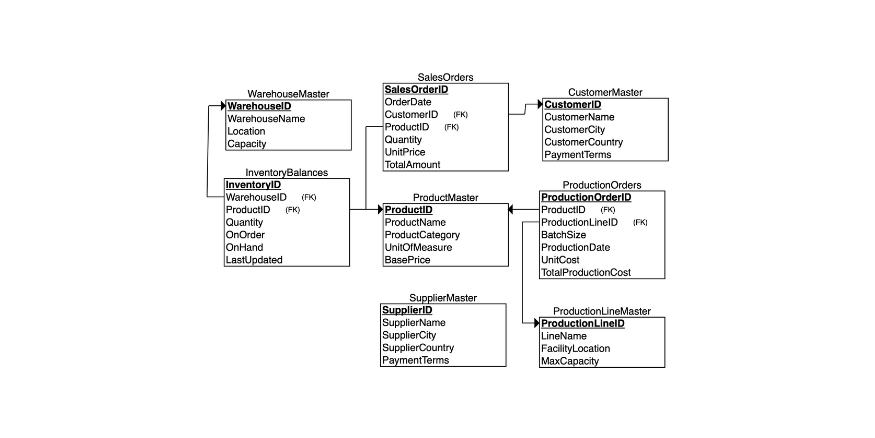


---
##### **1. Customer ↔ Sales**
**Relationship:**
- `CustomerID` in **Customer** connects to `CustomerID` in **Sales**.

**Example:**
- **CustomerMaster**: `CustomerID=2001`, `CustomerName=Callahan Inc`
- **SalesOrders**: `SalesOrderID=10001`, `CustomerID=2001`
  
**Explanation:**
Customer `Callahan Inc` (ID 2001) placed an order (SalesOrderID 10001). This relationship tracks which customers are making purchases.

---

##### **2. Product ↔ Sales**
**Relationship:**
- `ProductID` in **Product** connects to `ProductID` in **Sales**.

**Example:**
- **ProductMaster**: `ProductID=1022`, `ProductName=Pick Image`
- **SalesOrders**: `SalesOrderID=10001`, `ProductID=1022`

**Explanation:**
The product `Pick Image` (ID 1022) is part of a sales order. This relationship identifies which products are sold in each order.

---

##### **3. Warehouse ↔ Inventory**
**Relationship:**
- `WarehouseID` in **Warehouse** connects to `WarehouseID` in **Inventory**.

**Example:**
- **WarehouseMaster**: `WarehouseID=5001`, `WarehouseName=Warehouse_5001`
- **InventoryBalances**: `InventoryID=30001`, `WarehouseID=5001`

**Explanation:**
The warehouse `Warehouse_5001` (ID 5001) has inventory recorded in `InventoryID=30001`. This relationship tracks stock across locations.

---

##### **4. Product ↔ Inventory**
**Relationship:**
- `ProductID` in **Product** connects to `ProductID` in **Inventory**.

**Example:**
- **ProductMaster**: `ProductID=1003`, `ProductName=Old Tell`
- **InventoryBalances**: `InventoryID=30004`, `ProductID=1003`

**Explanation:**
The product `Old Tell` (ID 1003) has inventory in the warehouse linked to `InventoryID=30004`. This relationship ensures proper stock management for each product.

---

##### **5. Product ↔ Production Order**
**Relationship:**
- `ProductID` in **Product** connects to `ProductID` in **ProductionOrders**.

**Example:**
- **ProductMaster**: `ProductID=1009`, `ProductName=Attorney Cover`
- **ProductionOrders**: `ProductionOrderID=20003`, `ProductID=1009`

**Explanation:**
The product `Attorney Cover` (ID 1009) is manufactured under the production order `20003`. This relationship ties production to specific products.

---

##### **6. Production Order ↔ Production Line**
**Relationship:**
- `ProductionLineID` in **ProductionOrders** connects to `ProductionLineID` in **ProductionLineMaster**.

**Example:**
- **ProductionLineMaster**: `ProductionLineID=4001`, `LineName=Line_A_0`
- **ProductionOrders**: `ProductionOrderID=20001`, `ProductionLineID=4001`

**Explanation:**
The production order `20001` was executed on `Line_A_0` (ID 4001). This relationship monitors which production line is responsible for specific tasks.


---

##### **7. Sales ↔ Product ↔ Customer**
**Compound Relationship:**
- **CustomerMaster** links to **SalesOrders** via `CustomerID`.
- **SalesOrders** links to **ProductMaster** via `ProductID`.

**Example:**
- **CustomerMaster**: `CustomerID=2001`, `CustomerName=Callahan Inc`
- **SalesOrders**: `SalesOrderID=10001`, `CustomerID=2001`, `ProductID=1022`
- **ProductMaster**: `ProductID=1022`, `ProductName=Pick Image`

**Explanation:**
Customer `Callahan Inc` ordered the product `Pick Image` (ID 1022) under the sales order `10001`. This compound relationship tracks customer purchases and product demand.



### 4. **Data Cleaning** 
    - Check for missing values, duplicates, or inconsistent data.
    - Ensure correct data types (e.g., dates, numeric vs. string).
    - Document and fix any data quality issues or assumptions made.

In [16]:
#check there is a null values in each table
#isna() return Ture=1/False=0 , and sum them return (total number of 1 or True which is missing values cells)
for name,df in dataframes.items():
    print(f"{name}\n{df.isna().sum()}", end='\n\n')

Customer
CustomerID         0
CustomerName       0
CustomerCity       0
CustomerCountry    0
PaymentTerms       0
dtype: int64

Inventory
InventoryID    0
WarehouseID    0
ProductID      0
OnHand         0
OnOrder        0
LastUpdated    0
dtype: int64

Product
ProductID          0
ProductName        0
ProductCategory    0
UnitOfMeasure      0
BasePrice          0
dtype: int64

Product Line
ProductionLineID    0
LineName            0
FacilityLocation    0
MaxCapacity         0
dtype: int64

Pruduct Order
ProductionOrderID      0
ProductionLineID       0
ProductID              0
ProductionDate         0
BatchSize              0
UnitCost               0
TotalProductionCost    0
dtype: int64

Sales
SalesOrderID    0
OrderDate       0
CustomerID      0
ProductID       0
Quantity        0
UnitPrice       0
TotalAmount     0
dtype: int64

Supplier
SupplierID         0
SupplierName       0
SupplierCity       0
SupplierCountry    0
PaymentTerms       0
dtype: int64

Warehouse
WarehouseID      

#### There is no missing values in the dataset.

In [19]:
for name,df in dataframes.items():
    print(f"{name}\n{inventory.duplicated().sum()}", end='\n\n')

Customer
0

Inventory
0

Product
0

Product Line
0

Pruduct Order
0

Sales
0

Supplier
0

Warehouse
0



#### There is no duplicate in the dataset.

* Data type for numeric columns is int64 which is correct datatype.
* However string and date-time are set default as object, so they are needed to change to specific data type.
    * Object  > String
    * Object  > DateTime

In [23]:
for name,df in dataframes.items():
    print(name,end='\n\n')
    print(f"{df.info()}", end='\n\n')

Customer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CustomerID       500 non-null    int64 
 1   CustomerName     500 non-null    object
 2   CustomerCity     500 non-null    object
 3   CustomerCountry  500 non-null    object
 4   PaymentTerms     500 non-null    object
dtypes: int64(1), object(4)
memory usage: 19.7+ KB
None

Inventory

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   InventoryID  15000 non-null  int64 
 1   WarehouseID  15000 non-null  int64 
 2   ProductID    15000 non-null  int64 
 3   OnHand       15000 non-null  int64 
 4   OnOrder      15000 non-null  int64 
 5   LastUpdated  15000 non-null  object
dtypes: int64(5), object(1)
memory usage: 703.3+ KB
None

Product



In [25]:
#Change datatype object to string
for name in dataframes:
    dataframes[name]= dataframes[name].convert_dtypes()

In [27]:
#From inventory table, Change 'LastUpdated' column datatype to datetime for further analysis.
inventory['LastUpdated'] = pd.to_datetime(inventory['LastUpdated'])
dataframes['Inventory'] = inventory
print(inventory.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InventoryID  15000 non-null  int64         
 1   WarehouseID  15000 non-null  int64         
 2   ProductID    15000 non-null  int64         
 3   OnHand       15000 non-null  int64         
 4   OnOrder      15000 non-null  int64         
 5   LastUpdated  15000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(5)
memory usage: 703.3 KB
None


In [29]:
#From ProductOrder table, Change 'ProductionDate' column datatype to datetime for further analysis.
porder['ProductionDate'] = pd.to_datetime(porder['ProductionDate'])
dataframes['Product Order'] = porder
print(porder.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ProductionOrderID    5000 non-null   int64         
 1   ProductionLineID     5000 non-null   int64         
 2   ProductID            5000 non-null   int64         
 3   ProductionDate       5000 non-null   datetime64[ns]
 4   BatchSize            5000 non-null   int64         
 5   UnitCost             5000 non-null   float64       
 6   TotalProductionCost  5000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 273.6 KB
None


In [31]:
#From SalesOrder table, Change 'OrderDate' column datatype to datetime for further analysis.
sales['OrderDate'] = pd.to_datetime(sales['OrderDate'])
dataframes['Sales'] = sales
print(sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   SalesOrderID  25000 non-null  int64         
 1   OrderDate     25000 non-null  datetime64[ns]
 2   CustomerID    25000 non-null  int64         
 3   ProductID     25000 non-null  int64         
 4   Quantity      25000 non-null  int64         
 5   UnitPrice     25000 non-null  float64       
 6   TotalAmount   25000 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 1.3 MB
None


In [33]:
#check whether data type are correct.
for name,df in dataframes.items():
    print(name,end='\n\n')
    print(f"{df.info()}", end='\n\n')

Customer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CustomerID       500 non-null    Int64 
 1   CustomerName     500 non-null    string
 2   CustomerCity     500 non-null    string
 3   CustomerCountry  500 non-null    string
 4   PaymentTerms     500 non-null    string
dtypes: Int64(1), string(4)
memory usage: 20.1 KB
None

Inventory

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InventoryID  15000 non-null  int64         
 1   WarehouseID  15000 non-null  int64         
 2   ProductID    15000 non-null  int64         
 3   OnHand       15000 non-null  int64         
 4   OnOrder      15000 non-null  int64         
 5   LastUpdated  15000 non-null  datetime64[ns]
dtyp

In [35]:
merge_all_1 = sales.merge(customer, on='CustomerID', how='left') \
                              .merge(product, on='ProductID', how='left') \
                              .merge(porder, on='ProductID', how='left') \
                              .merge(pline, on='ProductionLineID', how='left')

In [37]:
merge_all_1

SalesOrderID  OrderDate  CustomerID  ProductID  Quantity  UnitPrice  \
0               10001 2025-06-30        2467       1022       899       3.68   
1               10001 2025-06-30        2467       1022       899       3.68   
2               10001 2025-06-30        2467       1022       899       3.68   
3               10001 2025-06-30        2467       1022       899       3.68   
4               10001 2025-06-30        2467       1022       899       3.68   
...               ...        ...         ...        ...       ...        ...   
4997541         35000 2024-08-15        2153       1020      3702       3.51   
4997542         35000 2024-08-15        2153       1020      3702       3.51   
4997543         35000 2024-08-15        2153       1020      3702       3.51   
4997544         35000 2024-08-15        2153       1020      3702       3.51   
4997545         35000 2024-08-15        2153       1020      3702       3.51   

         TotalAmount     CustomerName       CustomerCity CustomerCountry  ...  \
0            3308.32  Rosario-Navarro  West Jenniferport          Mexico  ...   
1            3308.32  Rosario-Navarro  West Jenniferport          Mexico  ...   
2            3308.32  Rosario-Navarro  West Jenniferport          Mexico  ...   
3            3308.32  Rosario-Navarro  West Jenniferport          Mexico  ...   
4            3308.32  Rosario-Navarro  West Jenniferport          Mexico  ...   
...              ...              ...                ...             ...  ...   
4997541     12994.02   Brennan-Valdez     Port Darylland           Italy  ...   
4997542     12994.02   Brennan-Valdez     Port Darylland           Italy  ...   
4997543     12994.02   Brennan-Valdez     Port Darylland           Italy  ...   
4997544     12994.02   Brennan-Valdez     Port Darylland           Italy  ...   
4997545     12994.02   Brennan-Valdez     Port Darylland           Italy  ...   

        BasePrice ProductionOrderID ProductionLineID ProductionDate  \
0            2.91             20001             4001     2024-02-18   
1            2.91             20010             4009     2023-04-18   
2            2.91             20021             4001     2024-05-24   
3            2.91             20080             4006     2023-12-24   
4            2.91             20105             4006     2024-09-19   
...           ...               ...              ...            ...   
4997541      2.56             24854             4006     2024-09-10   
4997542      2.56             24869             4004     2023-06-04   
4997543      2.56             24894             4007     2025-08-24   
4997544      2.56             24923             4001     2023-04-13   
4997545      2.56             24956             4007     2023-10-20   

         BatchSize  UnitCost  TotalProductionCost  LineName  \
0             1170      1.29              1509.30  Line_A_0   
1              562      2.04              1146.48  Line_I_8   
2             7678      1.00              7678.00  Line_A_0   
3             8510      1.42             12084.20  Line_F_5   
4              572      2.16              1235.52  Line_F_5   
...            ...       ...                  ...       ...   
4997541       7842      0.85              6665.70  Line_F_5   
4997542        676      0.93               628.68  Line_D_3   
4997543       6115      0.22              1345.30  Line_G_6   
4997544        632      0.29               183.28  Line_A_0   
4997545       2075      1.94              4025.50  Line_G_6   

           FacilityLocation  MaxCapacity  
0                Angelaberg        17457  
1        South Jasminemouth         5577  
2                Angelaberg        17457  
3               West Tracey         7312  
4               West Tracey         7312  
...                     ...          ...  
4997541         West Tracey         7312  
4997542            Ryanfurt         8760  
4997543    South Donnashire        16444  
4997544          Angelaberg        

In [39]:
merge_all_2 = sales.merge(product, on='ProductID', how='left') \
                              .merge(inventory, on='ProductID', how='left') \
                              .merge(wh, on='WarehouseID', how='left')

In [42]:
merge_all_2

SalesOrderID  OrderDate  CustomerID  ProductID  Quantity  UnitPrice  \
0                10001 2025-06-30        2467       1022       899       3.68   
1                10001 2025-06-30        2467       1022       899       3.68   
2                10001 2025-06-30        2467       1022       899       3.68   
3                10001 2025-06-30        2467       1022       899       3.68   
4                10001 2025-06-30        2467       1022       899       3.68   
...                ...        ...         ...        ...       ...        ...   
14996982         35000 2024-08-15        2153       1020      3702       3.51   
14996983         35000 2024-08-15        2153       1020      3702       3.51   
14996984         35000 2024-08-15        2153       1020      3702       3.51   
14996985         35000 2024-08-15        2153       1020      3702       3.51   
14996986         35000 2024-08-15        2153       1020      3702       3.51   

          TotalAmount   ProductName ProductCategory UnitOfMeasure  BasePrice  \
0             3308.32     Under Dog          Coffee          CASE       2.91   
1             3308.32     Under Dog          Coffee          CASE       2.91   
2             3308.32     Under Dog          Coffee          CASE       2.91   
3             3308.32     Under Dog          Coffee          CASE       2.91   
4             3308.32     Under Dog          Coffee          CASE       2.91   
...               ...           ...             ...           ...        ...   
14996982     12994.02  Discuss Them           Juice          CASE       2.56   
14996983     12994.02  Discuss Them           Juice          CASE       2.56   
14996984     12994.02  Discuss Them           Juice          CASE       2.56   
14996985     12994.02  Discuss Them           Juice          CASE       2.56   
14996986     12994.02  Discuss Them           Juice          CASE       2.56   

          InventoryID  WarehouseID  OnHand  OnOrder LastUpdated  \
0               30026         5010   13023     2324  2025-03-25   
1               30029         5005    6098     1584  2025-11-02   
2               30038         5012   18426      695  2024-03-25   
3               30046         5011    9850     3571  2024-02-04   
4               30048         5012    3394     2072  2023-06-15   
...               ...          ...     ...      ...         ...   
14996982        44905         5014   14778     3860  2023-08-03   
14996983        44911         5002    3887     2275  2025-10-21   
14996984        44918         5004   13700     2371  2025-02-05   
14996985        44946         5013     128     4879  2025-07-27   
14996986        44997         5002    2794     3972  2023-08-02   

           WarehouseName        Location  Capacity  
0         Warehouse_5010     West Amanda     84628  
1         Warehouse_5005      Chungmouth     42594  
2         Warehouse_5012      Port Brett     53338  
3         Warehouse_5011      Sydneyside     22675  
4         Warehouse_5012      Port Brett     53338  
...                  ...             ...       ...  
14996982  Warehouse_5014    Lake William     41227  
14996983  Warehouse_5002     Pamelaville     46434  
14996984  Warehouse_5004  Kathrynchester     24256  
14996985  Warehouse_5013       Cantufort     44022  
14996986  Warehouse_5002     Pamelaville     46434  

[14996987 rows x 19 columns]

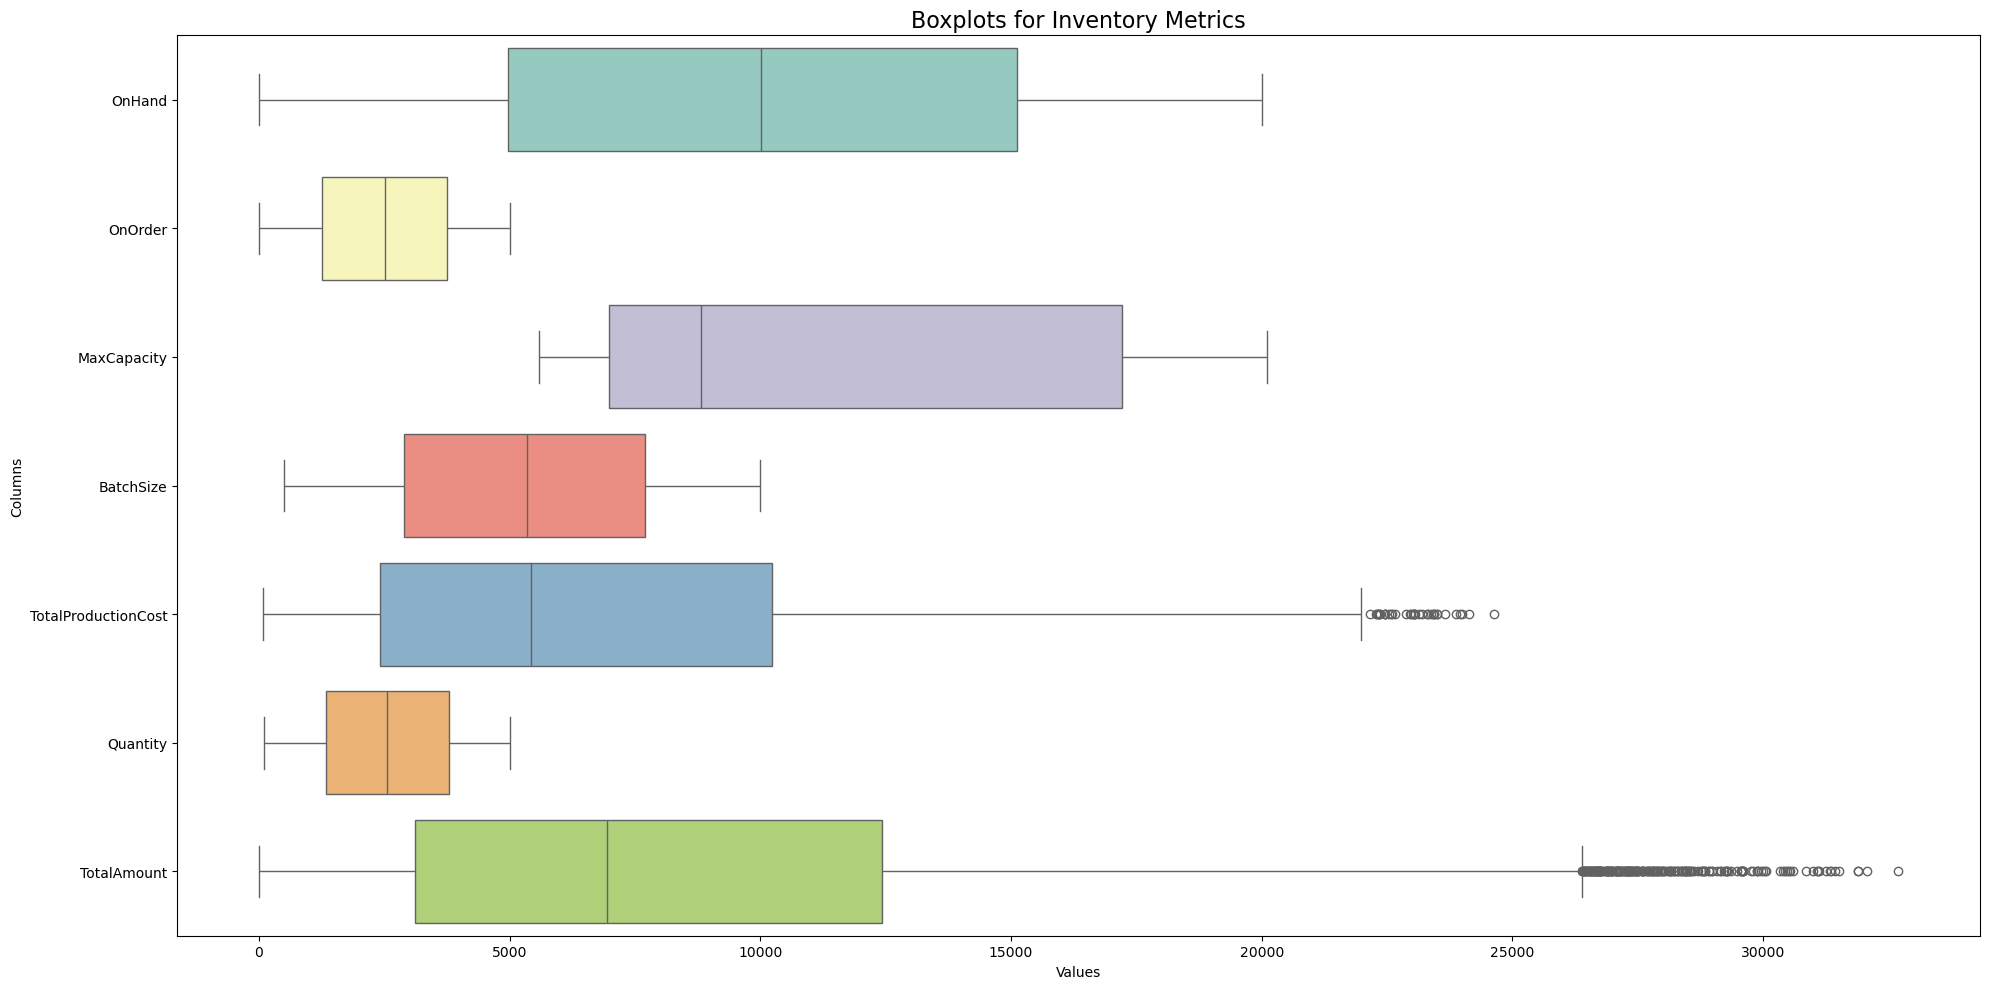

Box Plot Statistics:

Column: OnHand
Min: 2.0
Q1 (25th Percentile): 4973.5
Median (50th Percentile): 10007.0
Q3 (75th Percentile): 15126.5
Max: 19999.0
Number of Outliers: 0

Column: OnOrder
Min: 0.0
Q1 (25th Percentile): 1254.0
Median (50th Percentile): 2506.0
Q3 (75th Percentile): 3759.0
Max: 5000.0
Number of Outliers: 0

Column: MaxCapacity
Min: 5577.0
Q1 (25th Percentile): 6982.75
Median (50th Percentile): 8823.5
Q3 (75th Percentile): 17203.75
Max: 20113.0
Number of Outliers: 0

Column: BatchSize
Min: 500.0
Q1 (25th Percentile): 2889.5
Median (50th Percentile): 5343.5
Q3 (75th Percentile): 7694.0
Max: 10000.0
Number of Outliers: 0

Column: TotalProductionCost
Min: 78.96
Q1 (25th Percentile): 2406.4275000000002
Median (50th Percentile): 5426.46
Q3 (75th Percentile): 10241.8825
Max: 24636.06
Number of Outliers: 38

Column: Quantity
Min: 100.0
Q1 (25th Percentile): 1329.75
Median (50th Percentile): 2554.0
Q3 (75th Percentile): 3788.0
Max: 5000.0
Number of Outliers: 0

Column: TotalAmo

In [50]:
numeric_dfs = []

large_scale_columns = ["OnHand", "OnOrder", "MaxCapacity", "BatchSize", "TotalProductionCost", "Quantity", "TotalAmount"]

# Assuming `dataframes` is a dictionary of DataFrames
for _, df in dataframes.items():
    numeric_dfs.append(df)

# Concatenate all numeric DataFrames
df_num = pd.concat(numeric_dfs, axis=1)

# Remove duplicate column names
df_num = df_num.loc[:, ~df_num.columns.duplicated()]

# Filter for large scale columns
large_scale_df = df_num.loc[:, large_scale_columns]

# Plot boxplots for all numeric columns
plt.figure(figsize=(20, 10))
sns.boxplot(data=large_scale_df, orient='h', palette='Set3')
plt.title('Boxplots for Inventory Metrics', fontsize=16)
plt.xlabel('Values')
plt.ylabel('Columns')
plt.tight_layout()
plt.show()

# Calculate and print the statistics and outliers
print("Box Plot Statistics:")
total_outliers = 0

for column in large_scale_columns:
    stats = large_scale_df[column].describe()
    Q1 = stats['25%']
    Q3 = stats['75%']
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = large_scale_df[(large_scale_df[column] < lower_bound) | (large_scale_df[column] > upper_bound)]
    num_outliers = outliers.shape[0]
    total_outliers += num_outliers
    
    print(f"\nColumn: {column}")
    print(f"Min: {stats['min']}")
    print(f"Q1 (25th Percentile): {stats['25%']}")
    print(f"Median (50th Percentile): {stats['50%']}")
    print(f"Q3 (75th Percentile): {stats['75%']}")
    print(f"Max: {stats['max']}")
    print(f"Number of Outliers: {num_outliers}")

print(f"\nTotal Number of Outliers Across All Columns: {total_outliers}")

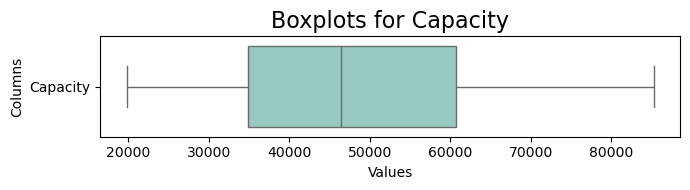

Box Plot Statistics for 'Capacity':

Column: Capacity
Min: 19792.0
Q1 (25th Percentile): 34914.5
Median (50th Percentile): 46434.0
Q3 (75th Percentile): 60661.0
Max: 85288.0


In [41]:
medium_scale_columns = ["Capacity"]

# Filter for medium scale columns
medium_scale_df = df_num.loc[:, medium_scale_columns]

# Plot boxplots for the numeric column
plt.figure(figsize=(7, 2))
sns.boxplot(data=medium_scale_df, orient='h', palette='Set3')
plt.title('Boxplots for Capacity', fontsize=16)
plt.xlabel('Values')
plt.ylabel('Columns')
plt.tight_layout()
plt.show()

# Calculate and print the statistics
print("Box Plot Statistics for 'Capacity':")
for column in medium_scale_columns:
    stats = medium_scale_df[column].describe()
    print(f"\nColumn: {column}")
    print(f"Min: {stats['min']}")
    print(f"Q1 (25th Percentile): {stats['25%']}")
    print(f"Median (50th Percentile): {stats['50%']}")
    print(f"Q3 (75th Percentile): {stats['75%']}")
    print(f"Max: {stats['max']}")

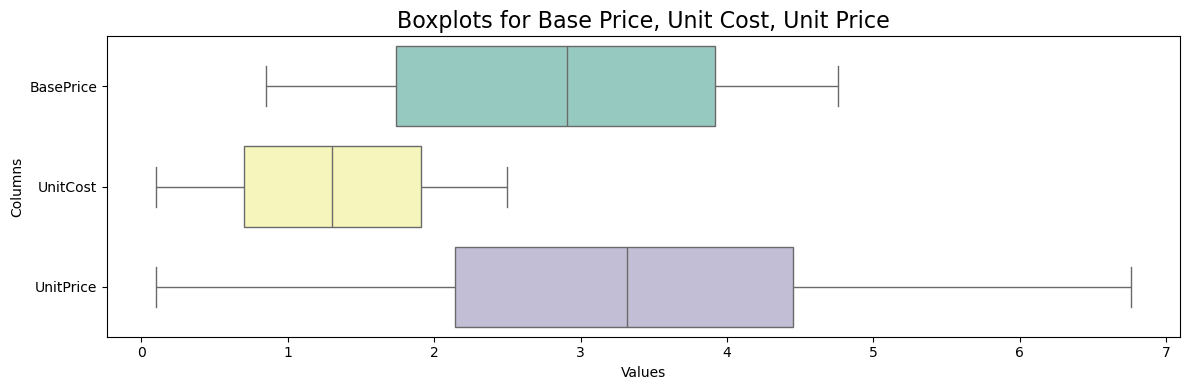

Box Plot Statistics for Small Scale Columns:

Column: BasePrice
Min: 0.85
Q1 (25th Percentile): 1.74
Median (50th Percentile): 2.91
Q3 (75th Percentile): 3.92
Max: 4.76

Column: UnitCost
Min: 0.1
Q1 (25th Percentile): 0.7
Median (50th Percentile): 1.3
Q3 (75th Percentile): 1.91
Max: 2.5

Column: UnitPrice
Min: 0.1
Q1 (25th Percentile): 2.14
Median (50th Percentile): 3.32
Q3 (75th Percentile): 4.45
Max: 6.76


In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

small_scale_columns = ["BasePrice", "UnitCost", "UnitPrice"]

# Filter for small scale columns
small_scale_df = df_num.loc[:, small_scale_columns]

# Plot boxplots for the numeric columns
plt.figure(figsize=(12, 4))
sns.boxplot(data=small_scale_df, orient='h', palette='Set3')
plt.title('Boxplots for Base Price, Unit Cost, Unit Price', fontsize=16)
plt.xlabel('Values')
plt.ylabel('Columns')
plt.tight_layout()
plt.show()

# Calculate and print the statistics
print("Box Plot Statistics for Small Scale Columns:")
for column in small_scale_columns:
    stats = small_scale_df[column].describe()
    print(f"\nColumn: {column}")
    print(f"Min: {stats['min']}")
    print(f"Q1 (25th Percentile): {stats['25%']}")
    print(f"Median (50th Percentile): {stats['50%']}")
    print(f"Q3 (75th Percentile): {stats['75%']}")
    print(f"Max: {stats['max']}")

#### *Note : Analysis (0)*
Interpret the boxplot and outlier.

## **5. Preliminary EDA (Exploratory Data Analysis)**


In [34]:
for name, df in dataframes.items():
    print(name, end='\n')
    print(f"{df.describe()}", end='\n\n')

Customer
       CustomerID
count       500.0
mean       2250.5
std    144.481833
min        2001.0
25%       2125.75
50%        2250.5
75%       2375.25
max        2500.0

Inventory
        InventoryID   WarehouseID     ProductID        OnHand       OnOrder  \
count  15000.000000  15000.000000  15000.000000  15000.000000  15000.000000   
mean   37500.500000   5008.012467   1013.031400  10017.517467   2502.751333   
min    30001.000000   5001.000000   1001.000000      2.000000      0.000000   
25%    33750.750000   5004.000000   1007.000000   4973.500000   1254.000000   
50%    37500.500000   5008.000000   1013.000000  10007.000000   2506.000000   
75%    41250.250000   5012.000000   1019.000000  15126.500000   3759.000000   
max    45000.000000   5015.000000   1025.000000  19999.000000   5000.000000   
std     4330.271354      4.320612      7.210049   5832.702310   1444.128129   

                      LastUpdated  
count                       15000  
mean   2024-07-04 00:33:01.440000 

                     Quantity  UnitPrice  TotalAmount  BasePrice  BatchSize  \
Quantity             1.000000  -0.001236     0.727581  -0.004506   0.000638   
UnitPrice           -0.001236   1.000000     0.599262   0.820786   0.004379   
TotalAmount          0.727581   0.599262     1.000000   0.488943   0.003247   
BasePrice           -0.004506   0.820786     0.488943   1.000000   0.005736   
BatchSize            0.000638   0.004379     0.003247   0.005736   1.000000   
UnitCost             0.000262  -0.008443    -0.004817  -0.010120  -0.007385   
TotalProductionCost  0.000816  -0.000899     0.000208  -0.000455   0.651278   
MaxCapacity         -0.000281   0.008662     0.005001   0.010673   0.013629   

                     UnitCost  TotalProductionCost  MaxCapacity  
Quantity             0.000262             0.000816    -0.000281  
UnitPrice           -0.008443            -0.000899     0.008662  
TotalAmount         -0.004817             0.000208     0.005001  
BasePrice           -0.0

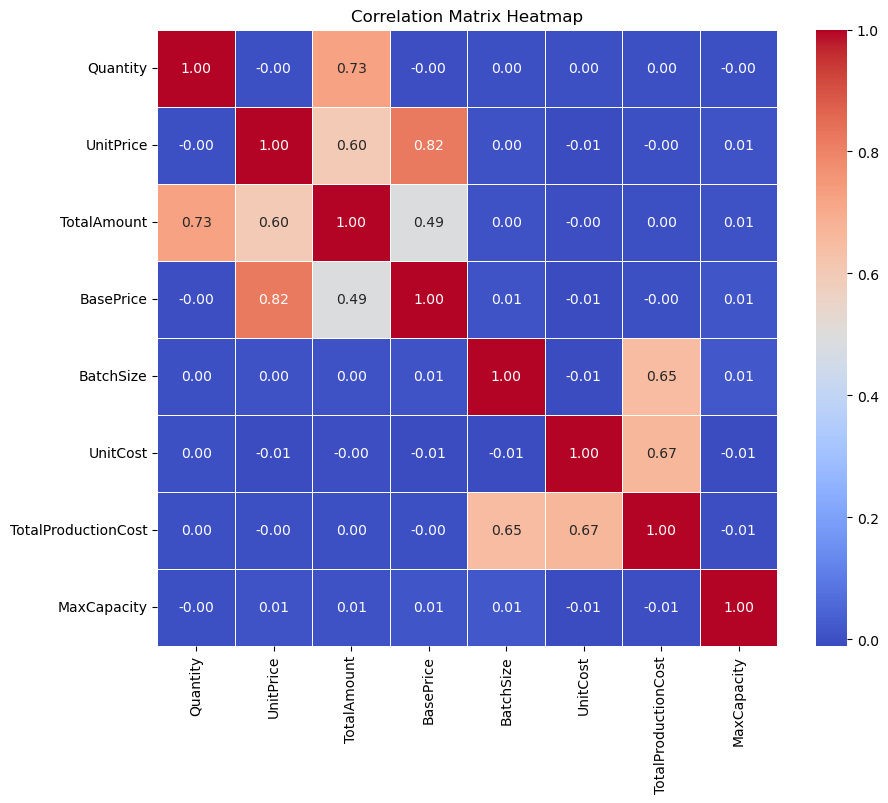

In [64]:
# Select only numeric columns first
numeric_cols_1 = merge_all_1.select_dtypes(include=['number'])

# Exclude columns containing 'ID' in their names
numeric_cols_1 = numeric_cols_1.loc[:, ~numeric_cols_1.columns.str.contains('ID', case=False)]

# Compute the correlation matrix
correlation_matrix_1 = numeric_cols_1.corr()

# Display the correlation matrix
print(correlation_matrix_1)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_1, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Show the plot
plt.title("Correlation Matrix Heatmap")
plt.show()

             Quantity  UnitPrice  TotalAmount  BasePrice    OnHand   OnOrder  \
Quantity     1.000000  -0.001769     0.723364  -0.004841  0.000036  0.000140   
UnitPrice   -0.001769   1.000000     0.602854   0.821552  0.006517 -0.008542   
TotalAmount  0.723364   0.602854     1.000000   0.492406  0.003895 -0.005047   
BasePrice   -0.004841   0.821552     0.492406   1.000000  0.008041 -0.010523   
OnHand       0.000036   0.006517     0.003895   0.008041  1.000000 -0.007718   
OnOrder      0.000140  -0.008542    -0.005047  -0.010523 -0.007718  1.000000   
Capacity    -0.000312   0.003035     0.001487   0.003822  0.002445  0.012612   

             Capacity  
Quantity    -0.000312  
UnitPrice    0.003035  
TotalAmount  0.001487  
BasePrice    0.003822  
OnHand       0.002445  
OnOrder      0.012612  
Capacity     1.000000  


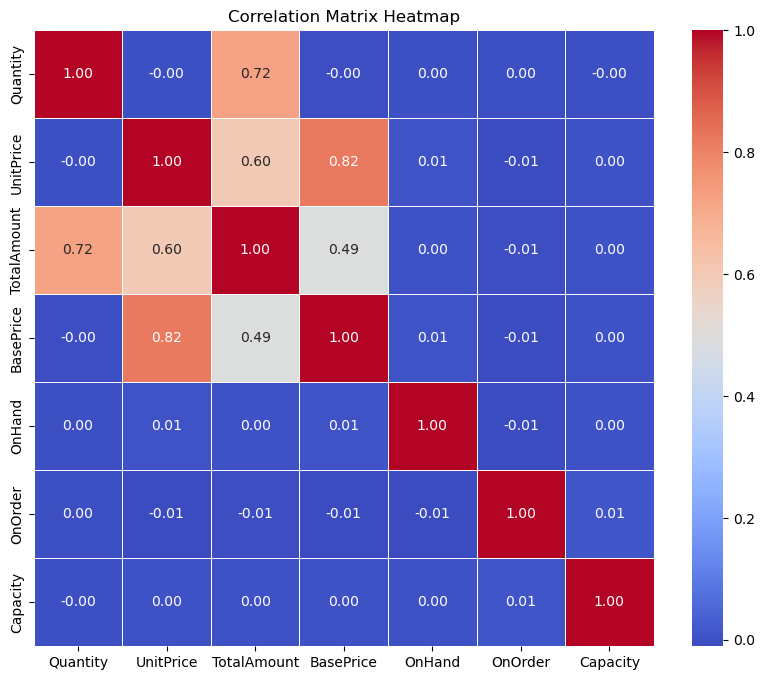

In [66]:
# Select only numeric columns first
numeric_cols_2 = merge_all_2.select_dtypes(include=['number'])

# Exclude columns containing 'ID' in their names
numeric_cols_2 = numeric_cols_2.loc[:, ~numeric_cols_2.columns.str.contains('ID', case=False)]

# Compute the correlation matrix
correlation_matrix_2 = numeric_cols_2.corr()

# Display the correlation matrix
print(correlation_matrix_2)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_2, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Show the plot
plt.title("Correlation Matrix Heatmap")
plt.show()

#### *Note : Analysis *

Ignore the columns that includes 'ID' because they are just to uniquely identify the records and cannot be done for further statistical analysis.


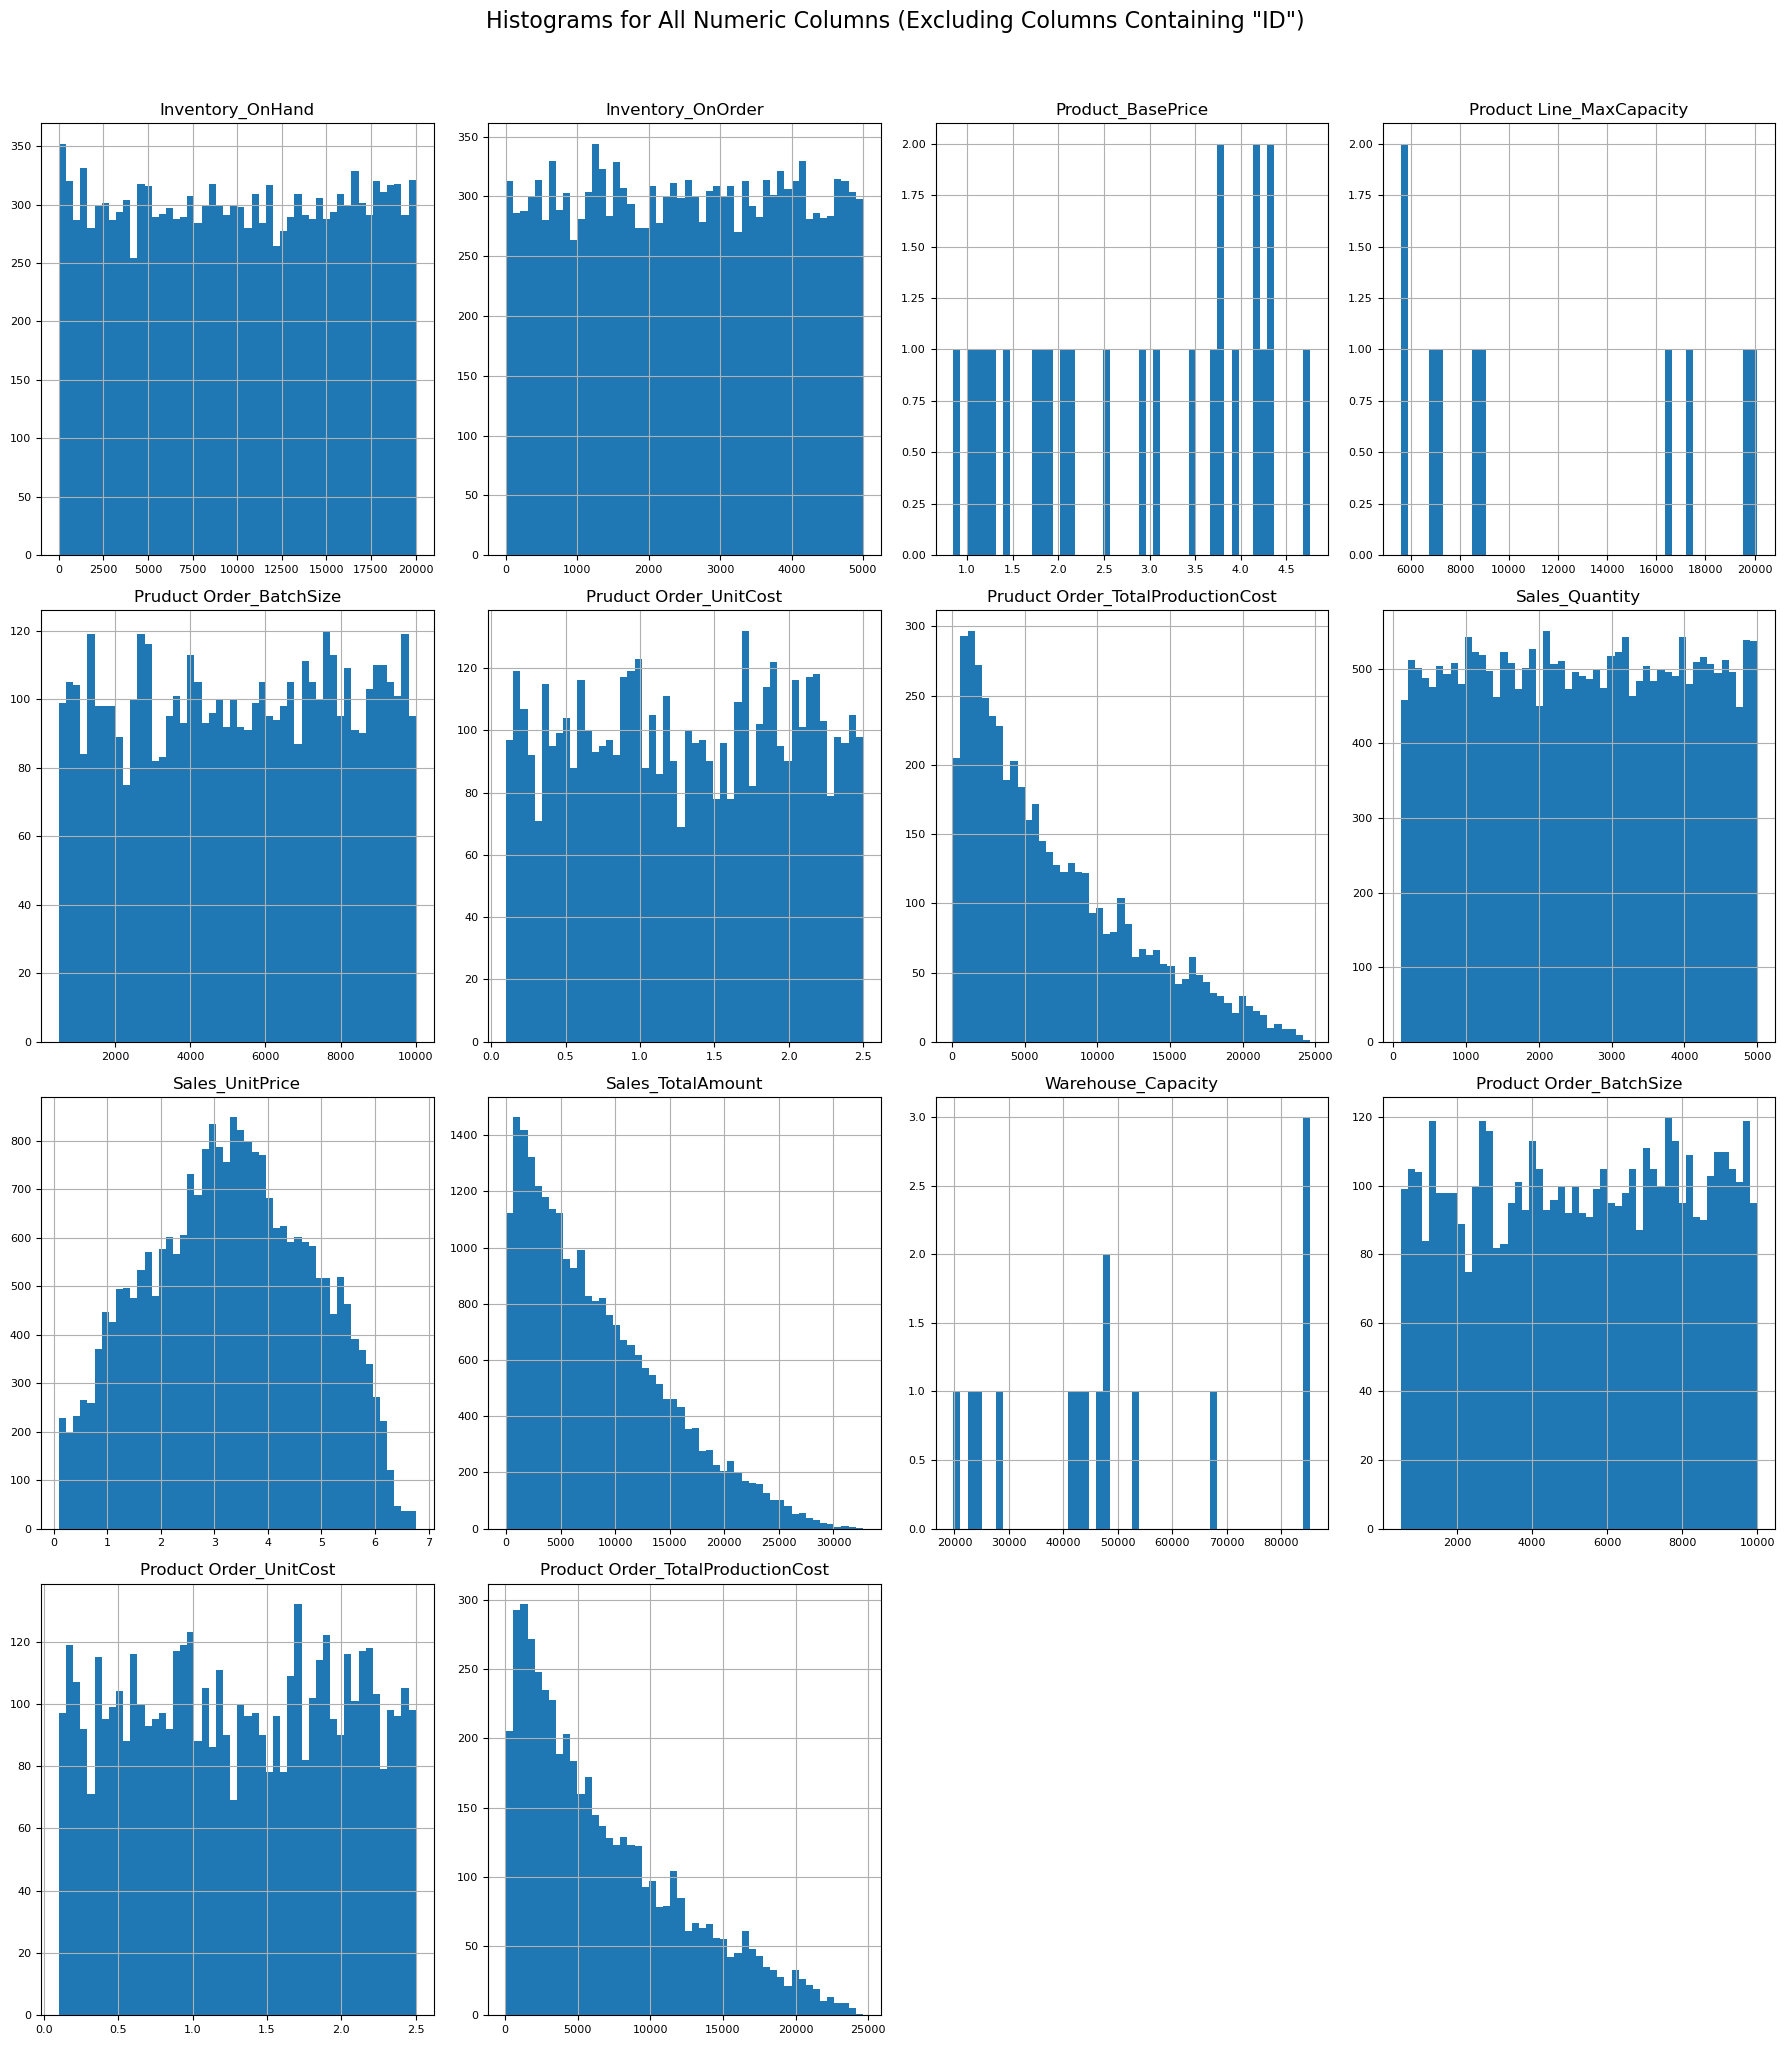

In [36]:
numeric_dfs = []

# Iterate through all DataFrames
for name, df in dataframes.items():
    # Select numeric columns, excluding those containing 'ID'
    numeric_cols = df.select_dtypes(include=['int64', 'float64'])
    numeric_cols = numeric_cols.loc[:, ~numeric_cols.columns.str.contains('ID', case=False)]
    if not numeric_cols.empty:
        numeric_dfs.append(numeric_cols)

# Concatenate all numeric DataFrames
df_num = pd.concat(numeric_dfs, axis=1)

# Ensure column names are unique
df_num.columns = [f"{name}_{col}" for name, df in dataframes.items() for col in df.select_dtypes(include=['int64', 'float64']).columns if 'ID' not in col]

# Plot histograms for all numeric columns
axes = df_num.hist(figsize=(18, 20), bins=50, xlabelsize=8, ylabelsize=8)
for ax in axes.flatten():
    ax.title.set_fontsize(12)
plt.suptitle('Histograms for All Numeric Columns (Excluding Columns Containing "ID")', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

#### *Note for Analysis *

Analyze the distribution of each figure.

Figure Name interpretation guide : TableName_ColumnName
Example : Inventory_OnHand
Inventory > Table Name
OnHand > Column Name

In [56]:
# for name, df in dataframes.items():
#     # Select only numeric columns (int and float) but exclude those ending with 'ID'
#     numeric_df = df.select_dtypes(include=['int64', 'float64'])
#     numeric_df = numeric_df.loc[:, ~numeric_df.columns.str.endswith('ID')]

#     # Proceed only if there are more than one numeric columns
#     if numeric_df.shape[1] > 1:
#         # Calculate the correlation matrix
#         correlation_matrix = numeric_df.corr()
#         print(f"\nCorrelation Matrix for {name}:\n")
#         print(correlation_matrix)
#         sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
#         plt.title(f'Correlation Matrix for {name}')
#         plt.show()
#     else:
#         print(f"\nSkipping correlation matrix for {name}: Less than 2 numeric columns (excluding 'ID').")

In [39]:
# Merge 1: Sales with Customers and Products
sales_customer_product = sales.merge(customer, on='CustomerID', how='left') \
                              .merge(product, on='ProductID', how='left')

# Merge 2: Inventory with Products and Warehouses
inventory_product_warehouse = inventory.merge(product, on='ProductID', how='left') \
                                       .merge(wh, on='WarehouseID', how='left')

# Merge 3: Production Orders with Production Lines and Products
production_order_details = porder.merge(pline, on='ProductionLineID', how='left') \
                                 .merge(product, on='ProductID', how='left')

In [40]:
# Preview merged datasets
print("Sales with Customers and Products:\n", sales_customer_product.head())
print("Inventory with Products and Warehouses:\n", inventory_product_warehouse.head())
print("Production Orders with Details:\n", production_order_details.head())

Sales with Customers and Products:
    SalesOrderID  OrderDate  CustomerID  ProductID  Quantity  UnitPrice  \
0         10001 2025-06-30        2467       1022       899       3.68   
1         10002 2023-08-23        2084       1002      1157       6.12   
2         10003 2023-06-12        2429       1009      3636       4.07   
3         10004 2025-02-13        2068       1004      1545       2.69   
4         10005 2023-11-24        2203       1009      4195       2.86   

   TotalAmount                     CustomerName        CustomerCity  \
0      3308.32                  Rosario-Navarro   West Jenniferport   
1      7080.84  Mitchell, Campos and Richardson  East Michelleville   
2     14798.52                 Hubbard and Sons          Port Shane   
3      4156.05        Taylor, Herman and Fisher         Bergchester   
4     11997.70                      King-Miller          Changburgh   

  CustomerCountry PaymentTerms    ProductName ProductCategory UnitOfMeasure  \
0          Me

#### *Note : Analysis (3)*

Analyze the correlation of each figure.

Eachfigure show the correlation matrix of numeric columns. 

## **Descriptive Data Analysis**

### **1. Customer Analysis**

* Who are our top customers by revenue and order frequency?
* Which regions (cities/countries) generate the most revenue?
* What is the distribution of payment terms among customers (COD, NET45, etc.)?
* Are there seasonal trends in customer purchases?
* Which customer demographics correlate with high purchase frequency or larger order sizes?

In [44]:
# Merge sales with customer data
sales_customers = sales.merge(customer, on='CustomerID', how='left')

sales_customers.head()

SalesOrderID  OrderDate  CustomerID  ProductID  Quantity  UnitPrice  \
0         10001 2025-06-30        2467       1022       899       3.68   
1         10002 2023-08-23        2084       1002      1157       6.12   
2         10003 2023-06-12        2429       1009      3636       4.07   
3         10004 2025-02-13        2068       1004      1545       2.69   
4         10005 2023-11-24        2203       1009      4195       2.86   

   TotalAmount                     CustomerName        CustomerCity  \
0      3308.32                  Rosario-Navarro   West Jenniferport   
1      7080.84  Mitchell, Campos and Richardson  East Michelleville   
2     14798.52                 Hubbard and Sons          Port Shane   
3      4156.05        Taylor, Herman and Fisher         Bergchester   
4     11997.70                      King-Miller          Changburgh   

  CustomerCountry PaymentTerms  
0          Mexico          EOM  
1           India          EOM  
2          France        NET15  
3       Australia        NET30  
4           Japan          COD

Top Customers by Revenue:
 CustomerName
Davis Ltd         1716102.39
Hill PLC           886240.31
Gonzalez Group     875519.08
Jackson Inc        865310.47
Jones and Sons     847993.06
Name: TotalAmount, dtype: float64


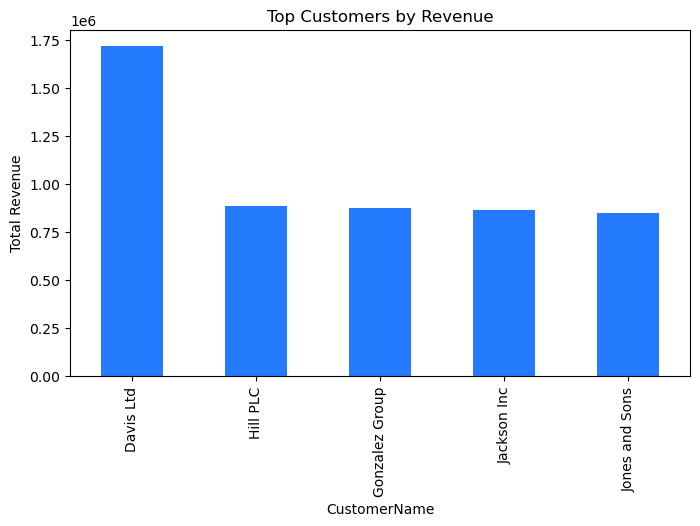

Top Customers by Order Frequency:
 CustomerName
Davis Ltd         198
Medina Inc        106
Jackson Inc       103
Gonzalez Group     98
Davis PLC          97
Name: count, dtype: int64


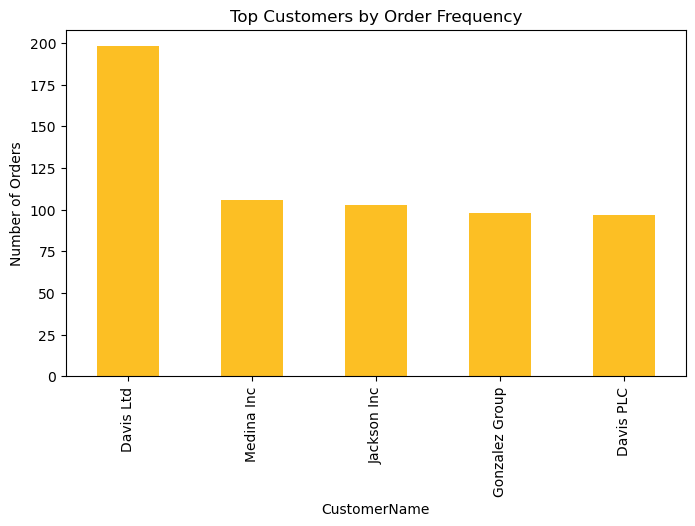

In [45]:
#Who are our top customers by revenue and order frequency?
# Top customers by revenue
top_customers_revenue = sales_customers.groupby('CustomerName')['TotalAmount'].sum().nlargest(5)
print("Top Customers by Revenue:\n", top_customers_revenue)

top_customers_revenue.plot(kind='bar', figsize=(8, 4.5), title='Top Customers by Revenue', ylabel='Total Revenue', color="#247afd")
plt.show()

# Top customers by order frequency
top_customers_frequency = sales_customers['CustomerName'].value_counts().nlargest(5)
print("Top Customers by Order Frequency:\n", top_customers_frequency)

top_customers_frequency.plot(kind='bar', figsize=(8, 4.5) , title='Top Customers by Order Frequency', ylabel='Number of Orders', color="#fcbf24")
plt.show()


Revenue by Country:
 CustomerCountry
Italy           20536274.12
Canada          19212798.08
Japan           18774680.45
China           15150569.67
Mexico          15146521.32
USA             13799780.48
Australia       13297808.56
France          13248180.04
UK              12506773.80
Spain           12269632.65
Brazil          12095236.88
Germany         11933509.58
South Africa    11733060.78
India           11435342.08
Singapore        9111168.04
Name: TotalAmount, dtype: float64


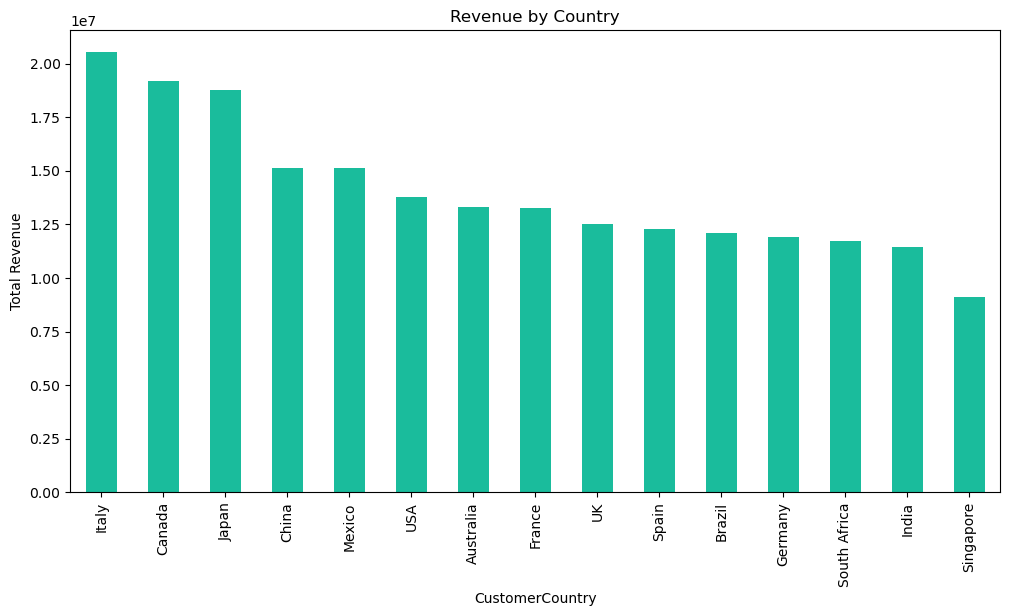

Top 10 Cities by Revenue:
 CustomerCity
East Heather    1044747.18
West Jessica     880679.27
New Michelle     844253.18
Sarahton         741400.88
West Angela      667074.16
Port Mason       645661.51
North James      615345.40
Lake Lisa        612107.80
North Arthur     607844.56
Emmaport         604311.00
Name: TotalAmount, dtype: float64


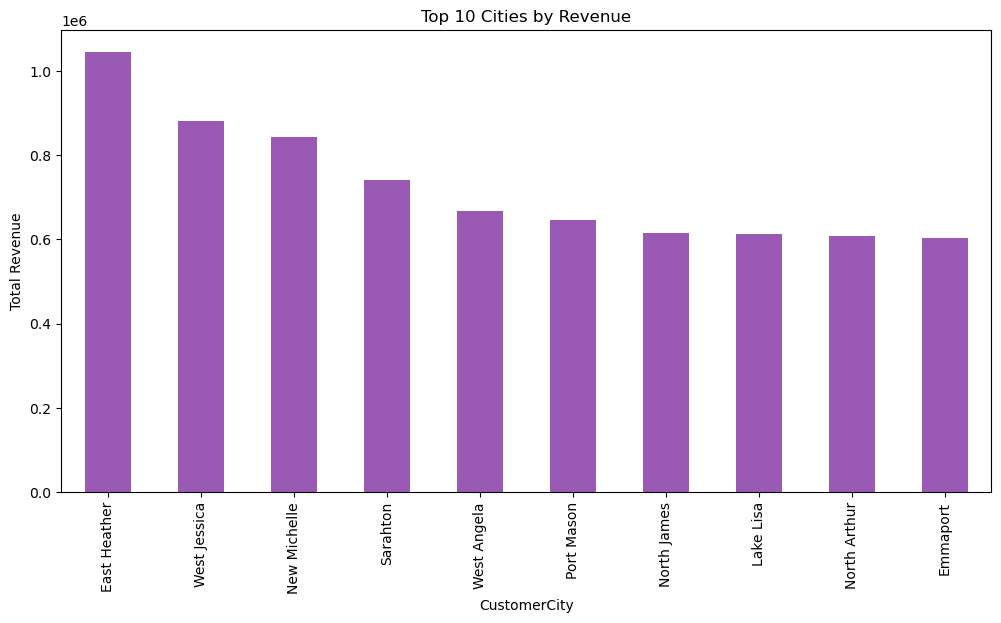

In [46]:
#Which regions (cities/countries) generate the most revenue?
# Revenue by Customer Country
revenue_by_country = sales_customers.groupby('CustomerCountry')['TotalAmount'].sum().sort_values(ascending=False)
print("Revenue by Country:\n", revenue_by_country)

revenue_by_country.plot(kind='bar', figsize=(12, 6), title='Revenue by Country', ylabel='Total Revenue', color="#1abc9c")
plt.show()

# Revenue by Customer City
revenue_by_city = sales_customers.groupby('CustomerCity')['TotalAmount'].sum().sort_values(ascending=False).nlargest(10)
print("Top 10 Cities by Revenue:\n", revenue_by_city)

revenue_by_city.plot(kind='bar', figsize=(12, 6), title='Top 10 Cities by Revenue', ylabel='Total Revenue', color="#9b59b6")
plt.show()


Payment Terms Distribution:
 PaymentTerms
EOM      5190
NET15    5131
NET30    5056
COD      4917
NET45    4706
Name: count, dtype: int64


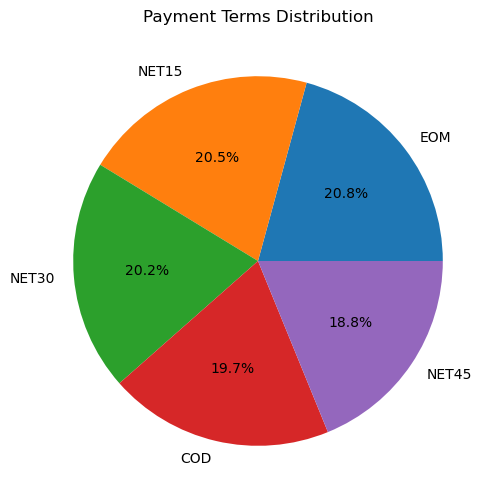

In [47]:
#What is the distribution of payment terms among customers (COD, NET45, etc.)?
# Distribution of Payment Terms
payment_terms_distribution = sales_customers['PaymentTerms'].value_counts()
print("Payment Terms Distribution:\n", payment_terms_distribution)

payment_terms_distribution.plot(kind='pie', figsize=(6, 6), autopct='%1.1f%%', title='Payment Terms Distribution')
plt.ylabel('')
plt.show()

Monthly Sales:
     Month  TotalAmount
0       1   6088677.84
1       2   5182089.57
2       3   5518069.77
3       4   5859870.71
4       5   6205915.66
5       6   6021387.49
6       7   6077811.69
7       8   6521135.49
8       9   5793738.13
9      10   6204177.15
10     11   5591410.58
11     12   6410299.86


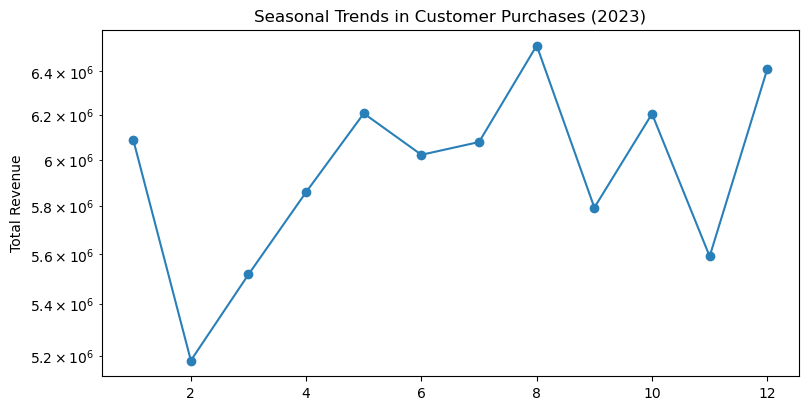

Monthly Sales:
     Month  TotalAmount
0       1   6088677.84
1       2   5182089.57
2       3   5518069.77
3       4   5859870.71
4       5   6205915.66
5       6   6021387.49
6       7   6077811.69
7       8   6521135.49
8       9   5793738.13
9      10   6204177.15
10     11   5591410.58
11     12   6410299.86


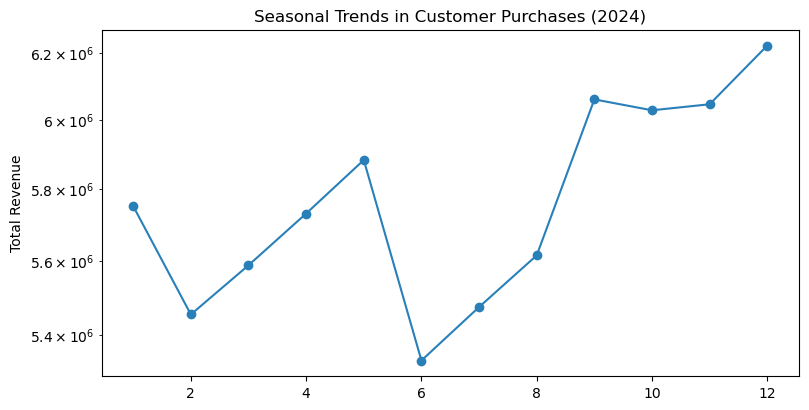

Monthly Sales:
     Month  TotalAmount
0       1   6088677.84
1       2   5182089.57
2       3   5518069.77
3       4   5859870.71
4       5   6205915.66
5       6   6021387.49
6       7   6077811.69
7       8   6521135.49
8       9   5793738.13
9      10   6204177.15
10     11   5591410.58
11     12   6410299.86


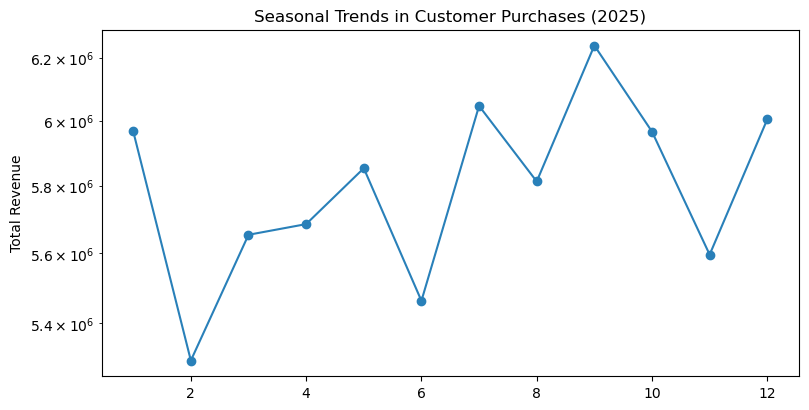

In [48]:
#Are there seasonal trends in customer purchases?
sales_customers['OrderDate'] = pd.to_datetime(sales_customers['OrderDate'])
sales_customers['Month'] = sales_customers['OrderDate'].dt.month
sales_customers['Year'] = sales_customers['OrderDate'].dt.year

monthly_sales_2023 = sales_customers[sales_customers["Year"]==2023].groupby('Month')['TotalAmount'].sum().reset_index()
print("Monthly Sales:\n", monthly_sales_2023)

plt.figure(figsize=(9, 4.5))
plt.plot(monthly_sales_2023["Month"],monthly_sales_2023["TotalAmount"],marker='o', color="#2980b9")
plt.title('Seasonal Trends in Customer Purchases (2023)')
plt.ylabel('Total Revenue')
# plt.yticks(range(0,8000000,1000000))
plt.yscale("log")
plt.show()


sales_customers['OrderDate'] = pd.to_datetime(sales_customers['OrderDate'])
sales_customers['Month'] = sales_customers['OrderDate'].dt.month

monthly_sales_2024 = sales_customers[sales_customers["Year"]==2024].groupby('Month')['TotalAmount'].sum().reset_index()
print("Monthly Sales:\n", monthly_sales_2023)

plt.figure(figsize=(9, 4.5))
plt.plot(monthly_sales_2024["Month"],monthly_sales_2024["TotalAmount"],marker='o', color="#2980b9")
plt.title('Seasonal Trends in Customer Purchases (2024)')
plt.ylabel('Total Revenue')
plt.yscale("log")
plt.show()

sales_customers['OrderDate'] = pd.to_datetime(sales_customers['OrderDate'])
sales_customers['Month'] = sales_customers['OrderDate'].dt.month

monthly_sales_2025 = sales_customers[sales_customers["Year"]==2025].groupby('Month')['TotalAmount'].sum().reset_index()
print("Monthly Sales:\n", monthly_sales_2023)

plt.figure(figsize=(9, 4.5))
plt.plot(monthly_sales_2025["Month"],monthly_sales_2025["TotalAmount"],marker='o', color="#2980b9")
plt.title('Seasonal Trends in Customer Purchases (2025)')
plt.ylabel('Total Revenue')
plt.yscale("log")
plt.show()

Demographic Correlation with Sales Metrics:
                                  TotalAmount  OrderFrequency
CustomerCountry CustomerCity                                
Australia       Bergchester        448317.77              54
                Calvinmouth        455334.09              51
                Colefort           461764.83              49
                East Samantha      358299.22              45
                Horneville         365229.26              50
...                                      ...             ...
USA             West Julie         421254.58              46
                West Lauriestad    441623.81              58
                West Paul          469528.33              60
                Williamfurt        285374.47              41
                Williamsonstad     422797.65              47

[499 rows x 2 columns]


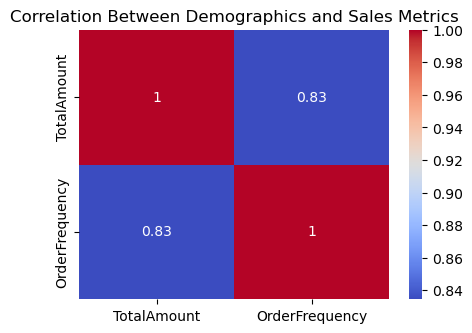

In [49]:
# Correlation between demographic columns and sales metrics (e.g., frequency or total amount)
demographic_sales = sales_customers.groupby(['CustomerCountry', 'CustomerCity']).agg({
    'TotalAmount': 'sum',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'OrderFrequency'})

print("Demographic Correlation with Sales Metrics:\n", demographic_sales)

# Visualize correlation (heatmap example)
plt.figure(figsize=(5,3.5))
sns.heatmap(demographic_sales.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Demographics and Sales Metrics')
plt.show()


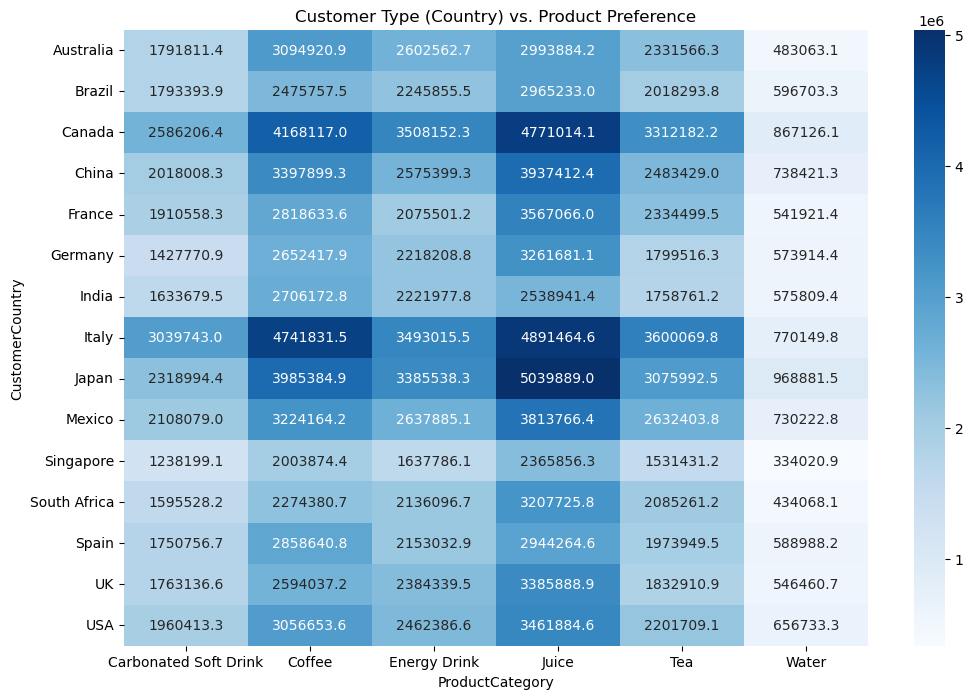

In [50]:
#Which customer demographics correlate with high purchase frequency or larger order sizes?
# Merge sales with customers and products
sales_customers_products = sales.merge(customer, on='CustomerID', how='left').merge(product, on='ProductID', how='left')

# Group by CustomerCountry and ProductCategory
customer_product_preference = sales_customers_products.groupby(['CustomerCountry', 'ProductCategory'])['TotalAmount'].sum().unstack()
customer_product_preference
# # Heatmap of preferences
plt.figure(figsize=(12, 8))
sns.heatmap(customer_product_preference, cmap='Blues', annot=True, fmt='.1f')
plt.title('Customer Type (Country) vs. Product Preference')
plt.show()


### 2. Sales Performance
* What are the overall sales trends (e.g., growth or decline) over time?
* What is the overall sales growth rate over time?
* Which products generate the most revenue or have the highest sales volume?
* What is the profit margin across different products or product categories?
* Are there any low-profit products that need to be addressed?

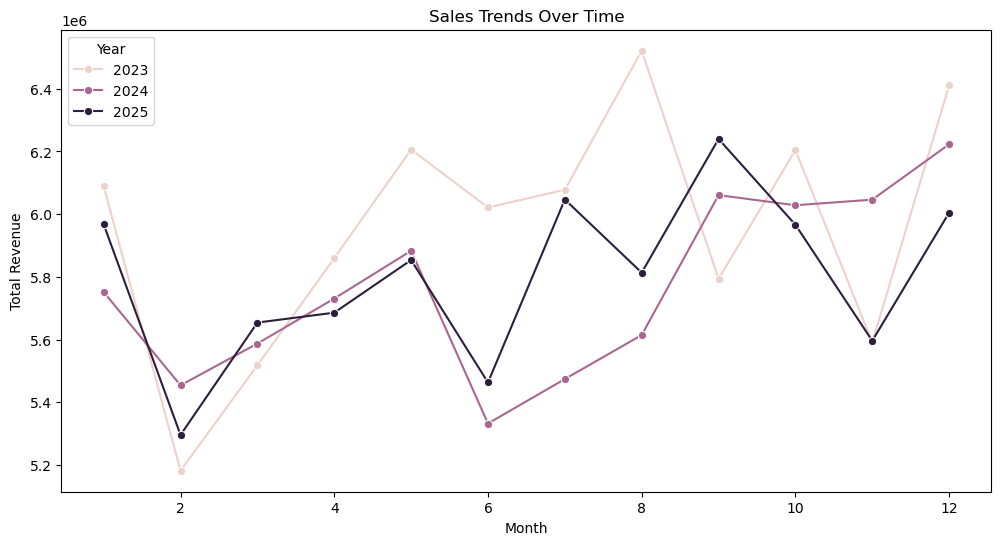

In [52]:
#What are the overall sales trends (e.g., growth or decline) over time?
# Extract year and month from OrderDate
sales['OrderDate'] = pd.to_datetime(sales['OrderDate'])
sales['Year'] = sales['OrderDate'].dt.year
sales['Month'] = sales['OrderDate'].dt.month

# Group by Year and Month to observe trends
sales_trends = sales.groupby(['Year', 'Month'])['TotalAmount'].sum().reset_index()

# Line plot for sales trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_trends, x='Month', y='TotalAmount', hue='Year', marker='o')
plt.title('Sales Trends Over Time')
plt.ylabel('Total Revenue')
plt.xlabel('Month')
plt.show()


YearMonth
2023-01          NaN
2023-02   -14.889740
2023-03     6.483489
2023-04     6.194212
2023-05     5.905334
2023-06    -2.973424
2023-07     0.937063
2023-08     7.294135
2023-09   -11.154459
2023-10     7.084183
2023-11    -9.876678
2023-12    14.645486
2024-01   -10.272752
2024-02    -5.171051
2024-03     2.441026
2024-04     2.567882
2024-05     2.657415
2024-06    -9.359636
2024-07     2.656586
2024-08     2.564955
2024-09     7.944422
2024-10    -0.532540
2024-11     0.295270
2024-12     2.920969
2025-01    -4.104785
2025-02   -11.248982
2025-03     6.764363
2025-04     0.557221
2025-05     2.951191
2025-06    -6.668519
2025-07    10.678519
2025-08    -3.857521
2025-09     7.333196
2025-10    -4.383694
2025-11    -6.201330
2025-12     7.300312
Freq: M, Name: TotalAmount, dtype: float64


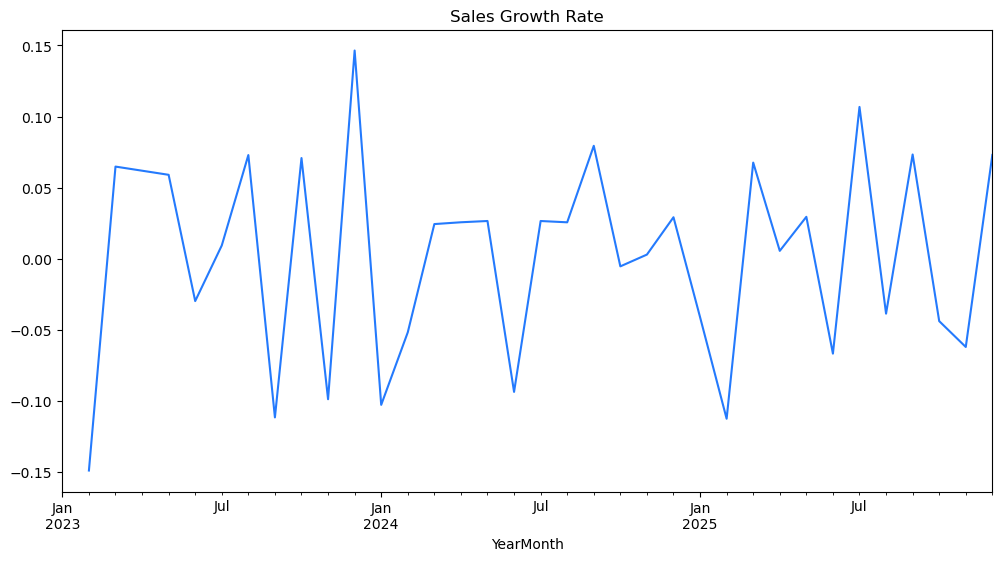

In [53]:
#What is the overall sales growth rate over time?
sales_customer_product['YearMonth'] = sales_customer_product['OrderDate'].dt.to_period('M')
sales_growth = sales_customer_product.groupby(['YearMonth'])['TotalAmount'].sum().pct_change()
print(sales_growth * 100)
sales_growth.plot(kind='line', title='Sales Growth Rate', figsize=(12, 6),color= "#247afd")
plt.show()

Top Products by Revenue:
 ProductName
Collection Wear         13649227.64
Culture Guess           12689710.66
Vote Term               11961434.35
Sense Fill              11942901.64
Born Near               11895406.38
Old Tell                11454547.22
Purpose Enter           11112563.56
Party Great             10876987.45
Information Democrat    10542652.01
Watch Could             10533873.92
Name: TotalAmount, dtype: float64
Top Products by Sales Volume:
 ProductName
Under Dog               2735466
Collection Religious    2709072
Culture Guess           2678613
Gun Rate                2641951
Cut Then                2611638
Collection Wear         2607695
Compare Ground          2605847
Energy Teacher          2595061
Vote Term               2586428
Think Decide            2584967
Name: Quantity, dtype: int64


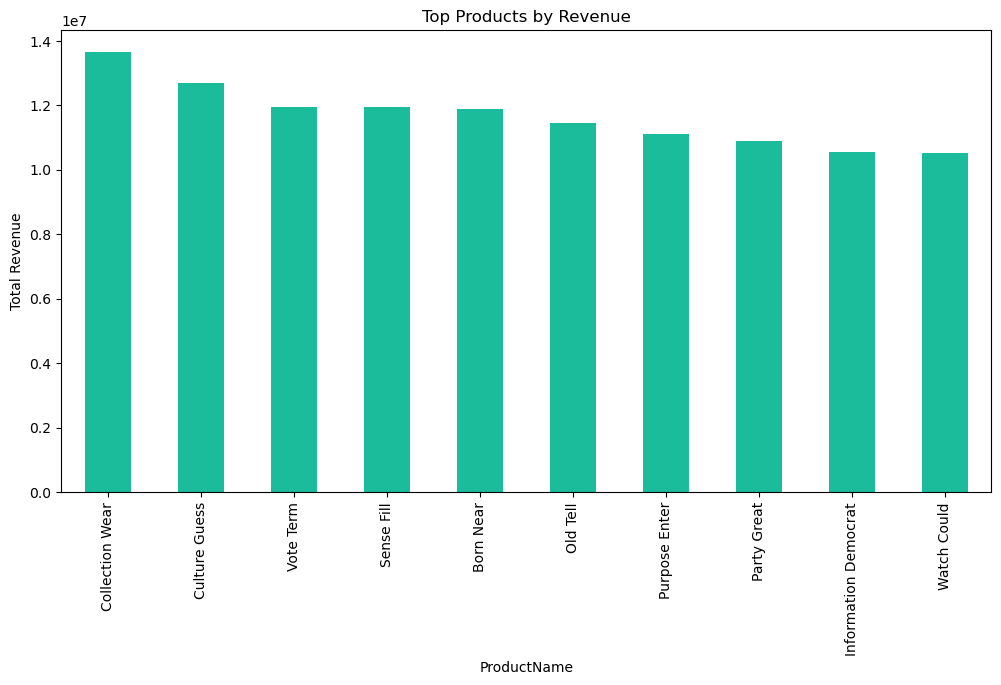

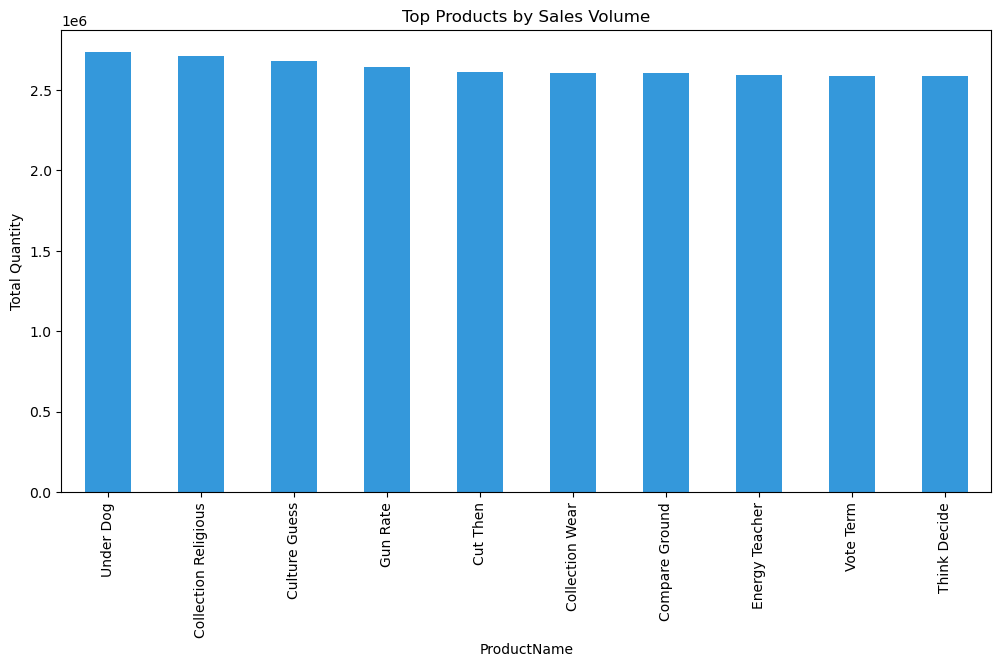

In [54]:
#Which products generate the most revenue or have the highest sales volume?
# Merge sales with product data
sales_products = sales.merge(product, on='ProductID', how='left')

# Revenue by product
revenue_by_product = sales_products.groupby('ProductName')['TotalAmount'].sum().sort_values(ascending=False)
print("Top Products by Revenue:\n", revenue_by_product.head(10))

# Sales volume by product
volume_by_product = sales_products.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False)
print("Top Products by Sales Volume:\n", volume_by_product.head(10))

# Plot revenue and sales volume
revenue_by_product.head(10).plot(kind='bar', figsize=(12, 6), title='Top Products by Revenue', ylabel='Total Revenue', color="#1abc9c")
plt.show()

volume_by_product.head(10).plot(kind='bar', figsize=(12, 6), title='Top Products by Sales Volume', ylabel='Total Quantity', color="#3498db")
plt.show()


Top Products by Profit Margin:
, ProductName
Pick Image              11.040642
Sign Ability            10.450241
Under Dog                9.338447
Stand Property           8.426702
Discuss Them             8.368583
Information Democrat     8.161939
Party Great              7.849332
Purpose Enter            7.757242
Watch Could              7.510032
Gun Rate                 7.479620
Name: ProfitMargin, dtype: float64


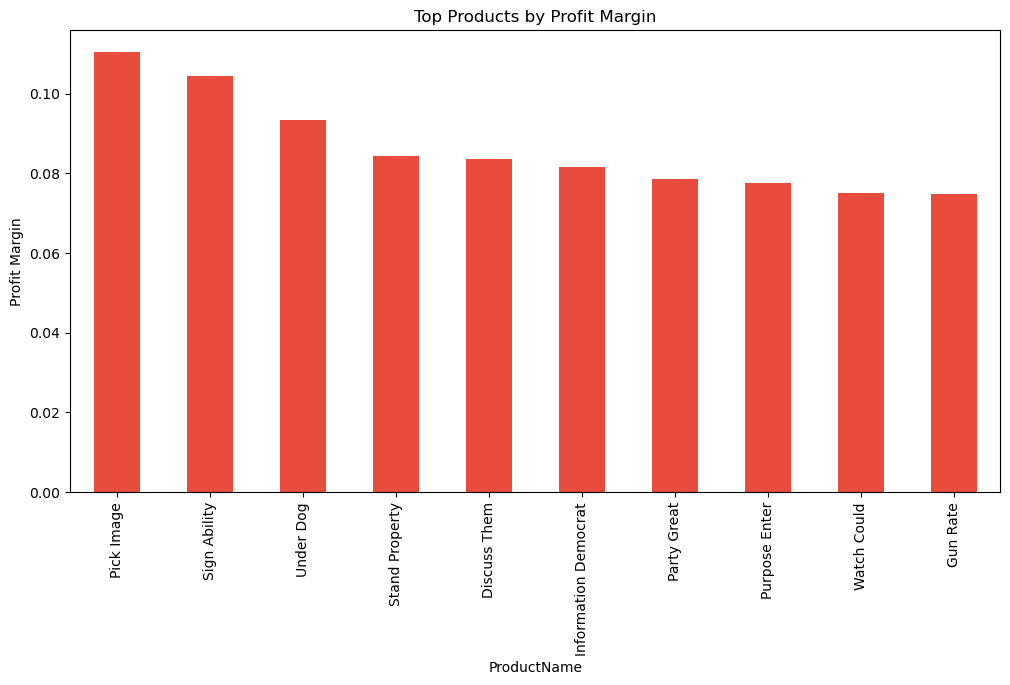

In [55]:
#What is the profit margin across different products or product categories?
# Calculate profit margin (Revenue - Cost) / Revenue
sales_products['ProfitMargin'] = (sales_products['TotalAmount'] - (sales_products['Quantity'] * sales_products['BasePrice'])) / sales_products['TotalAmount']

# Profit margin by product
profit_margin_by_product = sales_products.groupby('ProductName')['ProfitMargin'].mean().sort_values(ascending=False)
print(f"Top Products by Profit Margin:\n, {profit_margin_by_product.head(10) * 100}")

# Plot profit margins
profit_margin_by_product.head(10).plot(kind='bar', figsize=(12, 6), title='Top Products by Profit Margin', ylabel='Profit Margin', color="#e74c3c")
plt.show()



Profit Margin by Product Category:
 , ProductCategory
Tea                       8.518078
Coffee                    8.290984
Juice                     7.319325
Energy Drink              7.125141
Water                    -6.006955
Carbonated Soft Drink   -23.629059
Name: ProfitMargin, dtype: float64


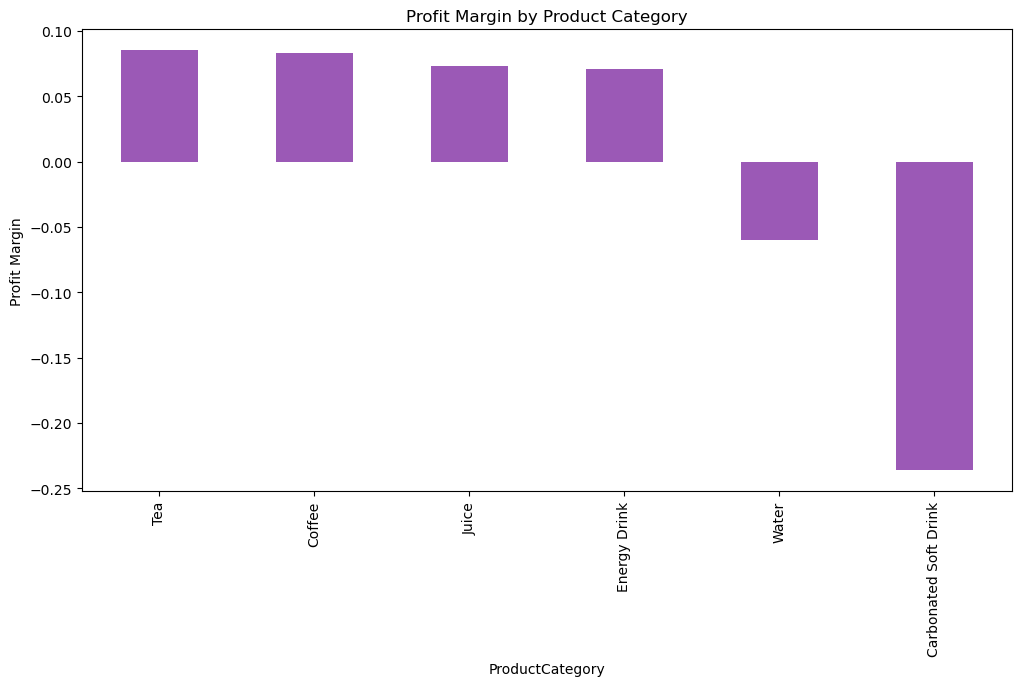

In [56]:
# Profit margin by product category
profit_margin_by_category = sales_products.groupby('ProductCategory')['ProfitMargin'].mean().sort_values(ascending=False)
print(f"Profit Margin by Product Category:\n , {profit_margin_by_category*100}")
profit_margin_by_category.plot(kind='bar', figsize=(12, 6), title='Profit Margin by Product Category', ylabel='Profit Margin', color="#9b59b6")
plt.show()

Low-Profit Products:
 ProductName
Think Decide           -2.784127
Attorney Cover         -1.651453
Cut Then               -1.331813
Compare Ground         -1.009867
Collection Religious   -0.755888
Energy Teacher         -0.593058
New Occur              -0.415022
Stand Property         -0.364186
Daughter Drop          -0.353208
Pick Image             -0.273409
Name: ProfitMargin, dtype: float64


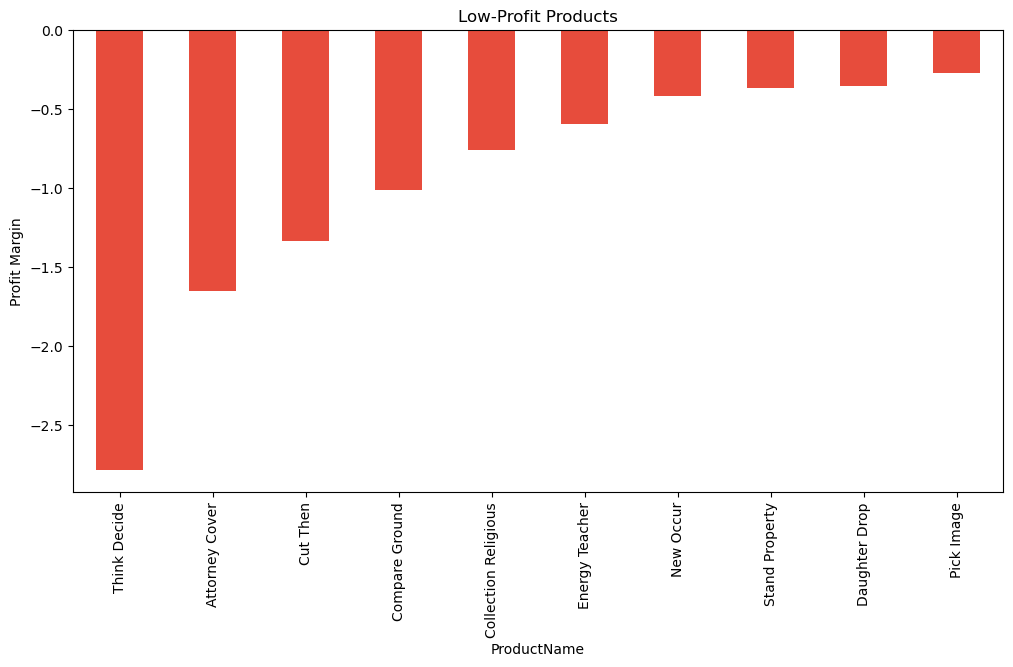

In [57]:
#Are there any low-profit products that need to be addressed?
# Identify low-profit products
low_profit_products = sales_products[sales_products['ProfitMargin'] < 0.1]  # Products with less than 10% profit margin
low_profit_summary = low_profit_products.groupby('ProductName')['ProfitMargin'].mean().sort_values()
print("Low-Profit Products:\n", low_profit_summary.head(10))

# Plot low-profit products
low_profit_summary.head(10).plot(kind='bar', figsize=(12, 6), title='Low-Profit Products', ylabel='Profit Margin', color="#e74c3c")
plt.show()


### 3. Inventory Management
* Which products are frequently out of stock, and how does this affect sales?
* What is the average inventory turnover rate across product categories?
* Are there products with excessive stock levels leading to high carrying costs?
* Which warehouses consistently operate near capacity, and which are underutilized?
* What is the time lag between OnOrder inventory and stock replenishment?
* Are there discrepancies between inventory levels across warehouses and demand in nearby regions?

In [59]:
# Merge inventory and sales data
sales_inventory = sales.merge(inventory, on='ProductID', how='left')
sales_inventory_product = sales_inventory.merge(product,  on='ProductID', how='left')
sales_inventory_product

SalesOrderID  OrderDate  CustomerID  ProductID  Quantity  UnitPrice  \
0                10001 2025-06-30        2467       1022       899       3.68   
1                10001 2025-06-30        2467       1022       899       3.68   
2                10001 2025-06-30        2467       1022       899       3.68   
3                10001 2025-06-30        2467       1022       899       3.68   
4                10001 2025-06-30        2467       1022       899       3.68   
...                ...        ...         ...        ...       ...        ...   
14996982         35000 2024-08-15        2153       1020      3702       3.51   
14996983         35000 2024-08-15        2153       1020      3702       3.51   
14996984         35000 2024-08-15        2153       1020      3702       3.51   
14996985         35000 2024-08-15        2153       1020      3702       3.51   
14996986         35000 2024-08-15        2153       1020      3702       3.51   

          TotalAmount  Year  Month  InventoryID  WarehouseID  OnHand  OnOrder  \
0             3308.32  2025      6        30026         5010   13023     2324   
1             3308.32  2025      6        30029         5005    6098     1584   
2             3308.32  2025      6        30038         5012   18426      695   
3             3308.32  2025      6        30046         5011    9850     3571   
4             3308.32  2025      6        30048         5012    3394     2072   
...               ...   ...    ...          ...          ...     ...      ...   
14996982     12994.02  2024      8        44905         5014   14778     3860   
14996983     12994.02  2024      8        44911         5002    3887     2275   
14996984     12994.02  2024      8        44918         5004   13700     2371   
14996985     12994.02  2024      8        44946         5013     128     4879   
14996986     12994.02  2024      8        44997         5002    2794     3972   

         LastUpdated   ProductName ProductCategory UnitOfMeasure  BasePrice  
0         2025-03-25     Under Dog          Coffee          CASE       2.91  
1         2025-11-02     Under Dog          Coffee          CASE       2.91  
2         2024-03-25     Under Dog          Coffee          CASE       2.91  
3         2024-02-04     Under Dog          Coffee          CASE       2.91  
4         2023-06-15     Under Dog          Coffee          CASE       2.91  
...              ...           ...             ...           ...        ...  
14996982  2023-08-03  Discuss Them           Juice          CASE       2.56  
14996983  2025-10-21  Discuss Them           Juice          CASE       2.56  
14996984  2025-02-05  Discuss Them           Juice          CASE       2.56  
14996985  2025-07-27  Discuss Them           Juice          CASE       2.56  
14996986  2023-08-02  Discuss Them           Juice          CASE       2.56  

[14996987 rows x 18 columns]

In [60]:
#Which products are frequently out of stock, and how does this affect sales?

out_of_stock_products = sales_inventory[sales_inventory['OnHand'] == 0]

# Check if there are any out-of-stock products
if out_of_stock_products.empty:
    print("No out-of-stock items. No loss of sales due to stockouts.")
else:
    # Calculate the number of times each product was out of stock
    out_of_stock_counts = out_of_stock_products['ProductID'].value_counts()
    print("Products Frequently Out of Stock:\n", out_of_stock_counts)

    # Impact on sales (TotalAmount lost when products were out of stock)
    sales_loss_due_to_stock = out_of_stock_products.groupby('ProductName')['TotalAmount'].sum().sort_values(ascending=False)
    print("Sales Impact Due to Stockouts:\n", sales_loss_due_to_stock)

    # Optional: Plot the sales loss due to stockouts
    sales_loss_due_to_stock.plot(kind='bar', figsize=(12, 6), title='Sales Impact Due to Stockouts', ylabel='Lost Sales', color="#e74c3c")
    plt.show()


No out-of-stock items. No loss of sales due to stockouts.


Average Inventory Turnover Rate by Category:
 ProductCategory
Juice                    1.634405
Energy Drink             1.389347
Coffee                   1.294464
Carbonated Soft Drink    1.281701
Tea                      0.897894
Water                    0.830449
Name: TurnoverRate, dtype: float64


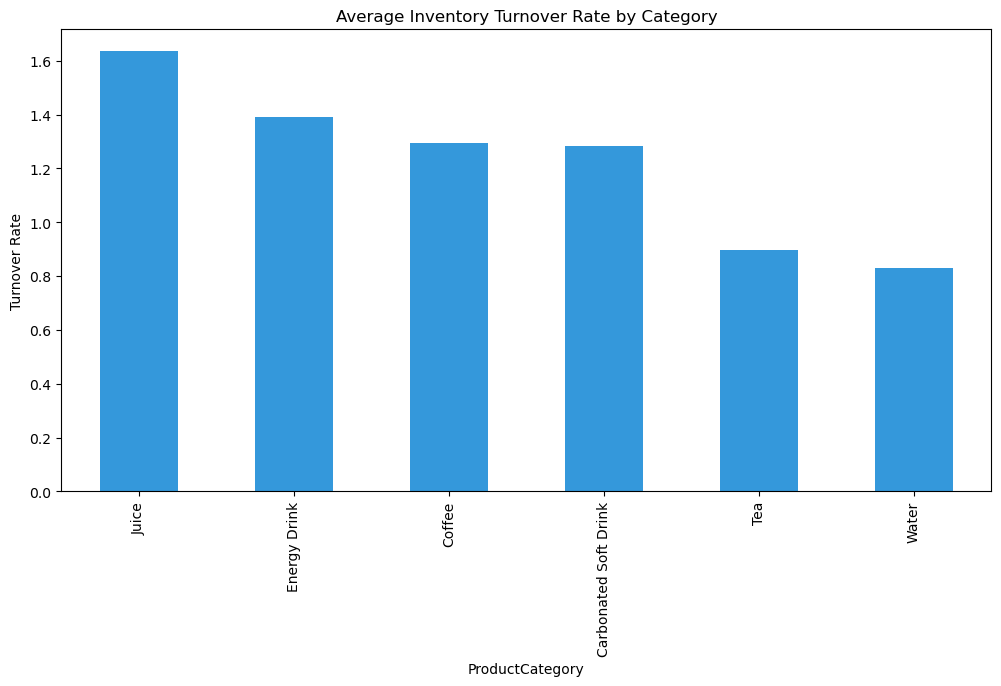

In [61]:
#What is the average inventory turnover rate across product categories?
# Calculate Inventory Turnover Rate = Total Sales Quantity / Average OnHand Inventory
sales_inventory_product['TurnoverRate'] = sales_inventory_product['Quantity'] / (sales_inventory_product['OnHand'] + 1)  # Avoid division by zero

# Group by product category and calculate average turnover rate
turnover_rate_by_category = sales_inventory_product.groupby('ProductCategory')['TurnoverRate'].mean().sort_values(ascending=False)
print("Average Inventory Turnover Rate by Category:\n", turnover_rate_by_category)

# Plot turnover rate by category
turnover_rate_by_category.plot(kind='bar', figsize=(12, 6), title='Average Inventory Turnover Rate by Category', ylabel='Turnover Rate', color="#3498db")
plt.show()


Products with High Carrying Costs:
 ProductName
Sense Fill              5.630835e+08
Born Near               5.344685e+08
Collection Wear         5.238563e+08
Culture Guess           4.937892e+08
Information Democrat    4.793825e+08
Party Great             4.758108e+08
Old Tell                4.573074e+08
Watch Could             4.552587e+08
Purpose Enter           4.542770e+08
Success Get             4.465590e+08
Name: CarryingCost, dtype: float64


/var/folders/s_/w_71vhqd2_j7_13y71_f0kvh0000gn/T/ipykernel_7746/2367253668.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  excessive_stock_products['CarryingCost'] = excessive_stock_products['OnHand'] * 0.1 * excessive_stock_products['BasePrice']


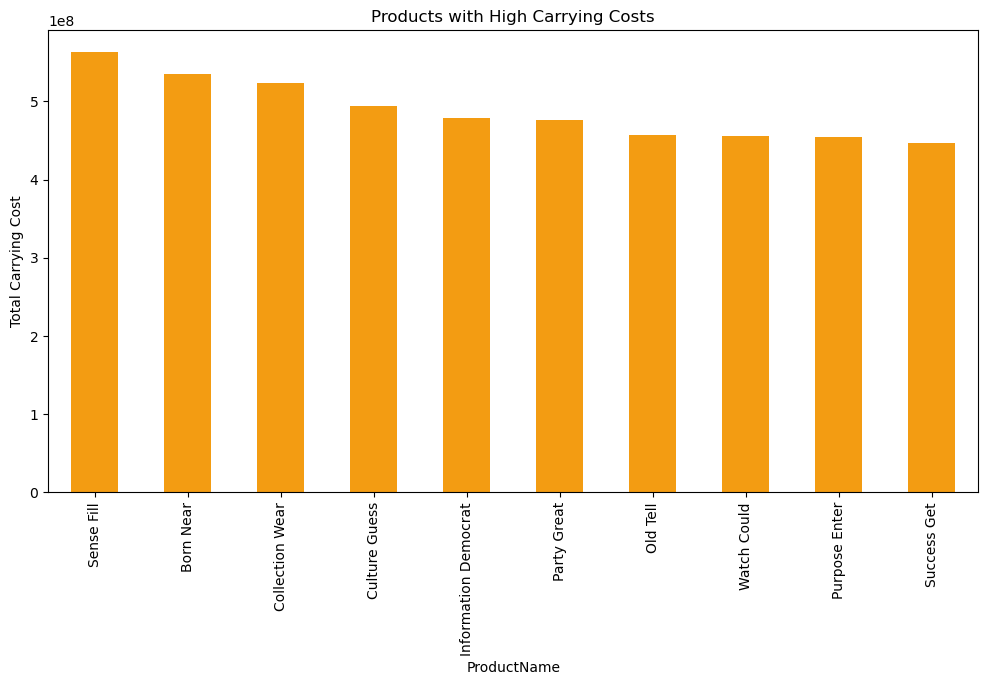

In [62]:
#Are there products with excessive stock levels leading to high carrying costs?

# Identify products with excessive stock (OnHand > 90th percentile)
excessive_stock_threshold = sales_inventory_product['OnHand'].quantile(0.9)
excessive_stock_products = sales_inventory_product[sales_inventory['OnHand'] > excessive_stock_threshold]

# Calculate total carrying costs (Assume carrying cost per unit = 0.1 * BasePrice)
excessive_stock_products['CarryingCost'] = excessive_stock_products['OnHand'] * 0.1 * excessive_stock_products['BasePrice']

# Products with the highest carrying costs
carrying_cost_summary = excessive_stock_products.groupby('ProductName')['CarryingCost'].sum().sort_values(ascending=False)
print("Products with High Carrying Costs:\n", carrying_cost_summary.head(10))

# Plot high carrying costs
carrying_cost_summary.head(10).plot(kind='bar', figsize=(12, 6), title='Products with High Carrying Costs', ylabel='Total Carrying Cost', color="#f39c12")
plt.show()


Warehouse Utilization:
 WarehouseName   Location          
Warehouse_5009  New Norman            0.493643
Warehouse_5011  Sydneyside            0.440648
Warehouse_5004  Kathrynchester        0.424707
Warehouse_5007  Charlesburgh          0.348161
Warehouse_5014  Lake William          0.239215
Warehouse_5005  Chungmouth            0.238177
Warehouse_5013  Cantufort             0.227028
Warehouse_5002  Pamelaville           0.212707
Warehouse_5015  Port Carlosborough    0.212560
Warehouse_5001  South Jacqueline      0.209872
Warehouse_5012  Port Brett            0.186144
Warehouse_5008  Morrischester         0.149085
Warehouse_5010  West Amanda           0.123310
Warehouse_5003  New Rachel            0.115607
Warehouse_5006  Davidtown             0.114445
Name: Utilization, dtype: float64


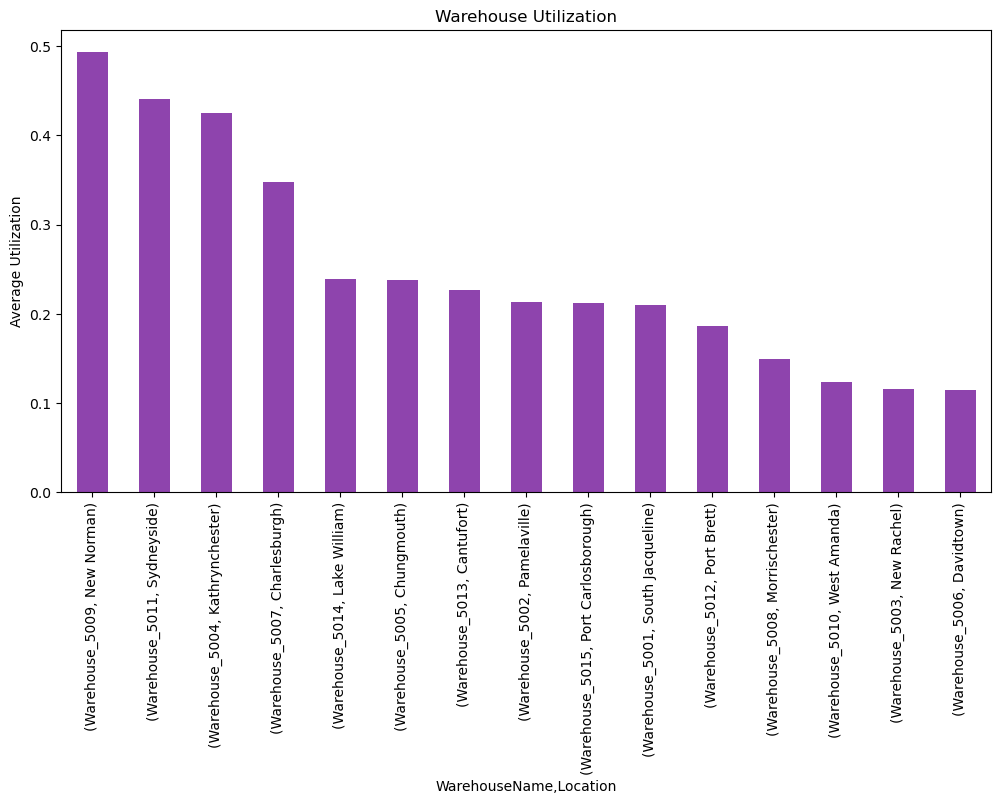

In [63]:
#Which warehouses consistently operate near capacity, and which are underutilized?
# Calculate warehouse utilization
inventory_product_warehouse['Utilization'] = inventory_product_warehouse['OnHand'] / inventory_product_warehouse['Capacity']

# Group by warehouse to analyze average utilization
warehouse_utilization = inventory_product_warehouse.groupby(['WarehouseName','Location'])['Utilization'].mean().sort_values(ascending=False)
print("Warehouse Utilization:\n", warehouse_utilization)

# Plot warehouse utilization
warehouse_utilization.plot(kind='bar', figsize=(12, 6), title='Warehouse Utilization', ylabel='Average Utilization', color="#8e44ad")
plt.show()

Average Time Lag by Product:
 ProductName
Attorney Cover         -44.447627
Under Dog              -17.189510
Think Decide           -15.190758
Sense Fill             -13.164623
Energy Teacher         -11.556237
Cut Then                -9.037815
Gun Rate                -8.638739
Old Tell                -4.956655
Pick Image              -3.531406
Success Get             -1.472406
Born Near               -0.364482
New Occur                1.246873
Collection Wear          4.658754
Information Democrat     6.019093
Compare Ground           6.122293
Discuss Them             6.430687
Culture Guess            6.841350
Sign Ability            11.997385
Collection Religious    12.934248
Stand Property          16.660234
Party Great             17.952258
Purpose Enter           22.087946
Vote Term               27.471287
Watch Could             27.585998
Daughter Drop           38.384208
Name: TimeLag, dtype: float64


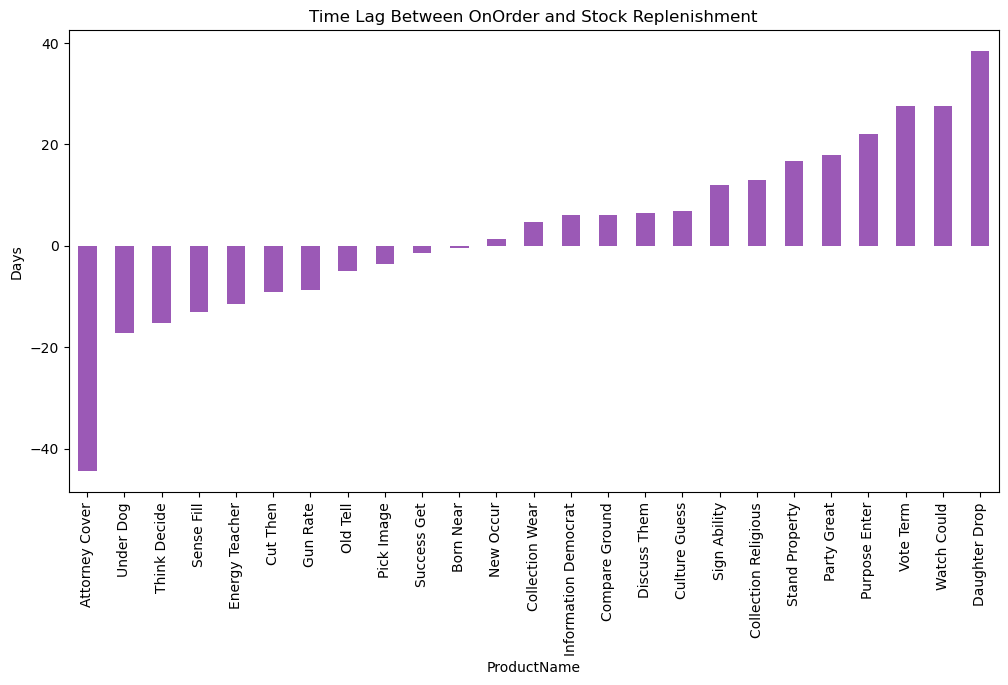

In [64]:
#What is the time lag between OnOrder inventory and stock replenishment?

# Calculate time lag (Assume 'LastUpdated' is the replenishment date)
inventory['LastUpdated'] = pd.to_datetime(sales_inventory_product['LastUpdated'])
sales_inventory_product['OrderDate'] = pd.to_datetime(sales_inventory_product['OrderDate'])
sales_inventory_product['TimeLag'] = (sales_inventory_product['LastUpdated'] - sales_inventory_product['OrderDate']).dt.days

# Average time lag by product
time_lag_summary = sales_inventory_product.groupby('ProductName')['TimeLag'].mean().sort_values()
print("Average Time Lag by Product:\n", time_lag_summary)

# Plot time lag
time_lag_summary.plot(kind='bar', figsize=(12, 6), title='Time Lag Between OnOrder and Stock Replenishment', ylabel='Days', color="#9b59b6")
plt.show()


Discrepancies Between Inventory and Demand by Region:
                     TotalInventory  TotalDemand  Discrepancy
Location                                                    
West Amanda            10607101547   2599821170   8007280377
Morrischester          10507802913   2650156897   7857646016
Kathrynchester         10411417895   2588042462   7823375433
Port Carlosborough     10370735109   2610971533   7759763576
Cantufort              10296398304   2635315889   7661082415
South Jacqueline       10150087002   2573324521   7576762481
Chungmouth             10017610500   2521209179   7496401321
Pamelaville            10053538126   2604625639   7448912487
New Norman              9913399758   2591309227   7322090531
Sydneyside              9803431985   2512346989   7291084996
Port Brett              9769103636   2517904297   7251199339
Charlesburgh            9730518623   2501588076   7228930547
Davidtown               9745244025   2555053827   7190190198
Lake William            953587

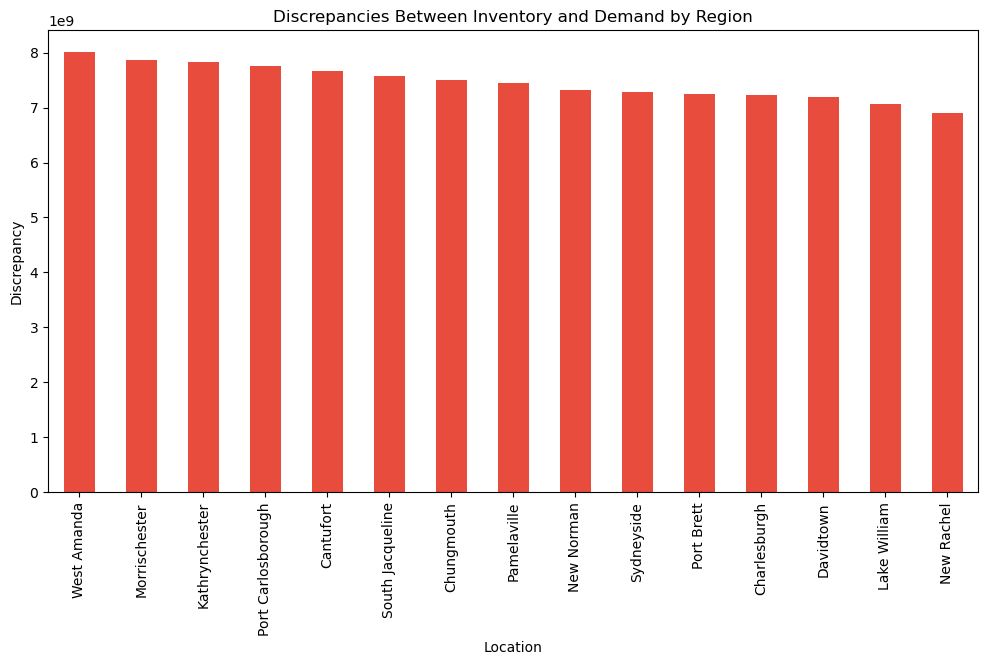

In [65]:
#Are there discrepancies between inventory levels across warehouses and demand in nearby regions?
# Merge sales, inventory, and warehouse data
regional_inventory_demand = sales.merge(inventory, on='ProductID', how='inner').merge(wh, on='WarehouseID', how='left')

# Group by region to compare inventory and demand
regional_discrepancies = regional_inventory_demand.groupby('Location').agg({
    'OnHand': 'sum',
    'Quantity': 'sum'
}).rename(columns={'OnHand': 'TotalInventory', 'Quantity': 'TotalDemand'})

# Calculate the discrepancy (inventory - demand)
regional_discrepancies['Discrepancy'] = regional_discrepancies['TotalInventory'] - regional_discrepancies['TotalDemand']
regional_discrepancies=regional_discrepancies.sort_values(by='Discrepancy',ascending=False)
print("Discrepancies Between Inventory and Demand by Region:\n", regional_discrepancies)

# Plot discrepancies
regional_discrepancies['Discrepancy'].plot(kind='bar', figsize=(12, 6), title='Discrepancies Between Inventory and Demand by Region', ylabel='Discrepancy', color="#e74c3c")
plt.show()


### 4. Product Insights
* Which product categories are the most profitable?
* What is the relationship between product price and sales volume?
* Are certain product categories more popular in specific regions or customer segments?
* How do unit costs and production costs vary across products, and what factors contribute to these variations?
* Which products have consistent demand versus those that are seasonal or declining?


Profit by Product Category:
 ProductCategory
Coffee                   6670061.13
Carbonated Soft Drink    6447431.11
Juice                    6038980.88
Tea                      5305093.93
Energy Drink             5041051.55
Water                    2516413.60
Name: Profit, dtype: float64


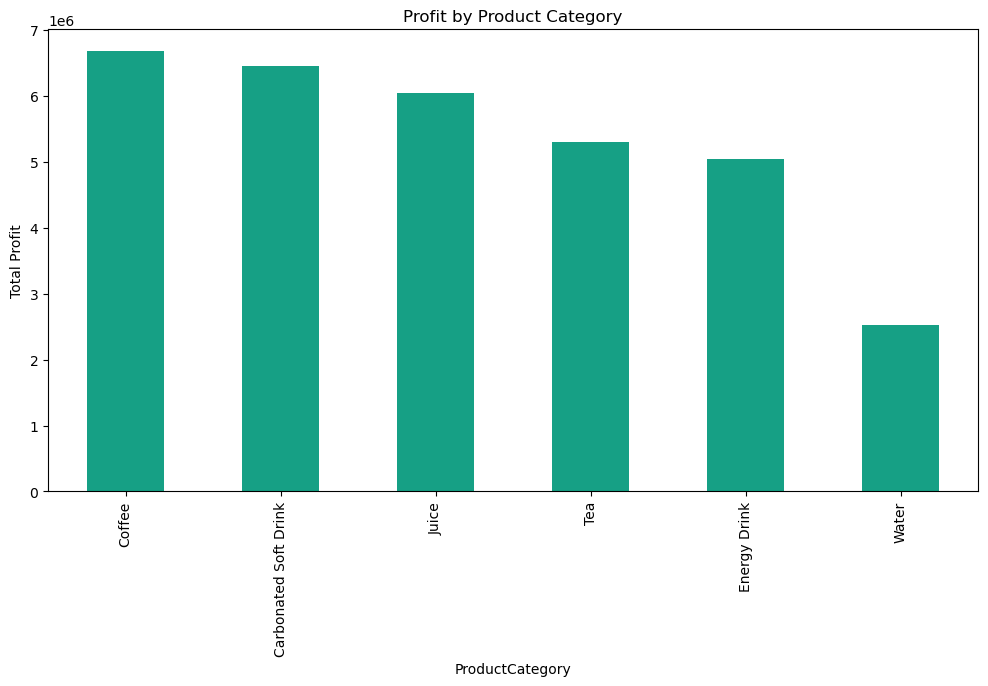

In [67]:
#Which product categories are the most profitable?

# Merge sales with product data
sales_products = sales.merge(product, on='ProductID', how='left')

# Calculate profit for each product (TotalAmount - (Quantity * BasePrice))
sales_products['Profit'] = sales_products['TotalAmount'] - (sales_products['Quantity'] * sales_products['BasePrice'])

# Group by Product Category to calculate total profit
profit_by_category = sales_products.groupby('ProductCategory')['Profit'].sum().sort_values(ascending=False)
print("Profit by Product Category:\n", profit_by_category)

# Plot profit by product category
profit_by_category.plot(kind='bar', figsize=(12, 6), title='Profit by Product Category', ylabel='Total Profit', color="#16a085")
plt.show()


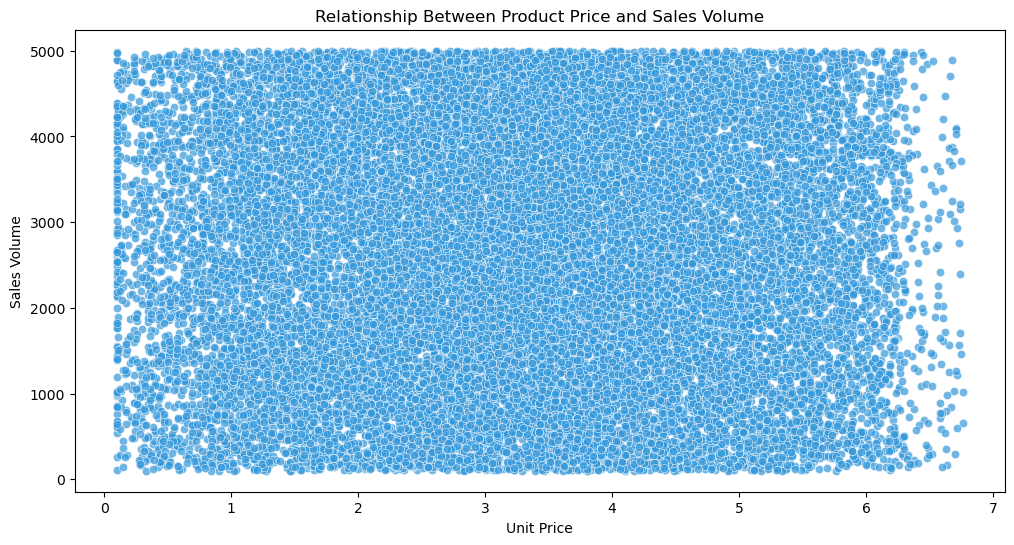

Correlation Between Product Price and Sales Volume:
            UnitPrice  Quantity
UnitPrice   1.000000 -0.001828
Quantity   -0.001828  1.000000


In [68]:
#What is the relationship between product price and sales volume?

# Scatter plot for UnitPrice vs. Quantity
plt.figure(figsize=(12, 6))
sns.scatterplot(data=sales_products, x='UnitPrice', y='Quantity', alpha=0.7, color="#3498db")
plt.title('Relationship Between Product Price and Sales Volume')
plt.xlabel('Unit Price')
plt.ylabel('Sales Volume')
plt.show()

# Correlation between price and sales volume
price_volume_corr = sales_products[['UnitPrice', 'Quantity']].corr()
print("Correlation Between Product Price and Sales Volume:\n", price_volume_corr)


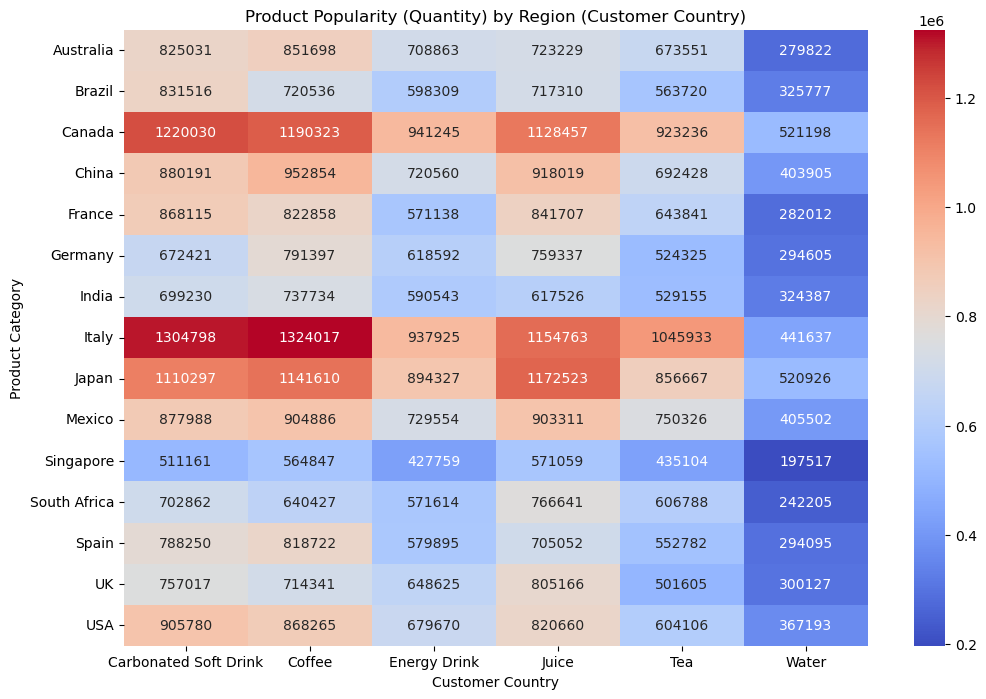

In [69]:
#Are certain product categories more popular in specific regions or customer segments?

# Merge sales, customer, and product data
sales_customers_products = sales.merge(customer, on='CustomerID', how='left').merge(product, on='ProductID', how='left')

# Group by Customer Country and Product Category
regional_product_popularity = sales_customers_products.groupby(['CustomerCountry', 'ProductCategory'])['Quantity'].sum().unstack()

# Heatmap for product popularity by region
plt.figure(figsize=(12, 8))
sns.heatmap(regional_product_popularity, cmap='coolwarm', annot=True, fmt='.0f')
plt.title('Product Popularity (Quantity) by Region (Customer Country)')
plt.ylabel('Product Category')
plt.xlabel('Customer Country')
plt.show()

In [70]:
production_products = porder.merge(product, on='ProductID', how='left')
production_products.head()

ProductionOrderID  ProductionLineID  ProductID ProductionDate  BatchSize  \
0              20001              4001       1022     2024-02-18       1170   
1              20002              4010       1003     2025-07-12       3726   
2              20003              4001       1009     2025-01-26       9475   
3              20004              4002       1010     2025-01-24       7378   
4              20005              4007       1021     2023-01-02       2954   

   UnitCost  TotalProductionCost      ProductName        ProductCategory  \
0      1.29              1509.30        Under Dog                 Coffee   
1      0.85              3167.10         Old Tell                    Tea   
2      2.31             21887.25      Party Great           Energy Drink   
3      0.67              4943.26  Collection Wear                 Coffee   
4      0.80              2363.20     Think Decide  Carbonated Soft Drink   

  UnitOfMeasure  BasePrice  
0          CASE       2.91  
1           BOX       4.31  
2           CAN       3.72  
3           CAN       4.76  
4           CAN       0.85

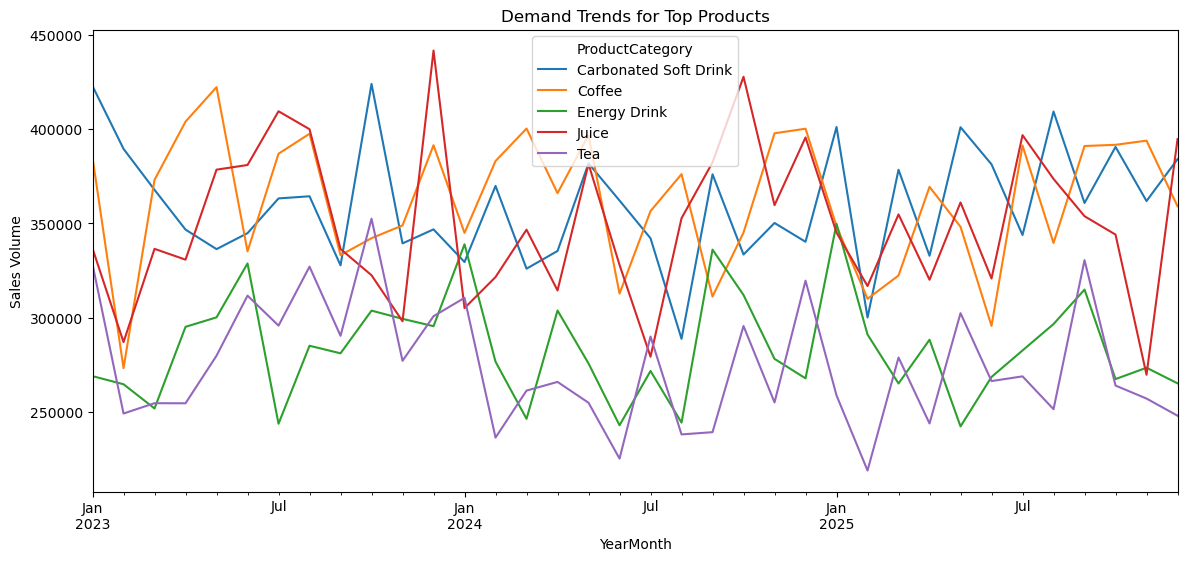

In [71]:
#Which products have consistent demand versus those that are seasonal or declining?
# Extract Year-Month for demand trends
sales_products['YearMonth'] = sales_products['OrderDate'].dt.to_period('M')

# Group by product and month to analyze demand trends
demand_trends = sales_products.groupby(['ProductCategory', 'YearMonth'])['Quantity'].sum().reset_index()

# Pivot for visualizing trends
demand_trends_pivot = demand_trends.pivot(index='YearMonth', columns='ProductCategory', values='Quantity').fillna(0)

# Line plot for demand trends of top products
demand_trends_pivot.iloc[:, :5].plot(figsize=(14, 6), title='Demand Trends for Top Products', ylabel='Sales Volume')
plt.show()


### 5. Production Efficiency
* Which production lines are operating at or near capacity?
* Are there inefficiencies in production costs (e.g., high UnitCost for specific products)?
* What is the average production lead time for each product?
* Are there specific production lines with high downtime or underutilization?
* How frequently do we face production variances (planned vs. actual output)?

In [73]:
production_product = porder.merge(pline, on='ProductionLineID', how='left')
production_product

ProductionOrderID  ProductionLineID  ProductID ProductionDate  \
0                 20001              4001       1022     2024-02-18   
1                 20002              4010       1003     2025-07-12   
2                 20003              4001       1009     2025-01-26   
3                 20004              4002       1010     2025-01-24   
4                 20005              4007       1021     2023-01-02   
...                 ...               ...        ...            ...   
4995              24996              4006       1004     2023-05-29   
4996              24997              4005       1024     2025-10-10   
4997              24998              4001       1023     2023-04-20   
4998              24999              4001       1018     2023-11-11   
4999              25000              4009       1002     2023-07-10   

      BatchSize  UnitCost  TotalProductionCost  LineName    FacilityLocation  \
0          1170      1.29              1509.30  Line_A_0          Angelaberg   
1          3726      0.85              3167.10  Line_J_9      Caitlinchester   
2          9475      2.31             21887.25  Line_A_0          Angelaberg   
3          7378      0.67              4943.26  Line_B_1        Brandonshire   
4          2954      0.80              2363.20  Line_G_6    South Donnashire   
...         ...       ...                  ...       ...                 ...   
4995       2891      0.68              1965.88  Line_F_5         West Tracey   
4996       9945      1.86             18497.70  Line_E_4           Avilafort   
4997       4654      0.37              1721.98  Line_A_0          Angelaberg   
4998       2941      0.47              1382.27  Line_A_0          Angelaberg   
4999       2059      2.32              4776.88  Line_I_8  South Jasminemouth   

      MaxCapacity  
0           17457  
1           20113  
2           17457  
3            6873  
4           16444  
...           ...  
4995         7312  
4996         8887  
4997        17457  
4998        17457  
4999         5577  

[5000 rows x 10 columns]

In [74]:
production_products = production_product.merge(product, on='ProductID', how='left')
production_products

ProductionOrderID  ProductionLineID  ProductID ProductionDate  \
0                 20001              4001       1022     2024-02-18   
1                 20002              4010       1003     2025-07-12   
2                 20003              4001       1009     2025-01-26   
3                 20004              4002       1010     2025-01-24   
4                 20005              4007       1021     2023-01-02   
...                 ...               ...        ...            ...   
4995              24996              4006       1004     2023-05-29   
4996              24997              4005       1024     2025-10-10   
4997              24998              4001       1023     2023-04-20   
4998              24999              4001       1018     2023-11-11   
4999              25000              4009       1002     2023-07-10   

      BatchSize  UnitCost  TotalProductionCost  LineName    FacilityLocation  \
0          1170      1.29              1509.30  Line_A_0          Angelaberg   
1          3726      0.85              3167.10  Line_J_9      Caitlinchester   
2          9475      2.31             21887.25  Line_A_0          Angelaberg   
3          7378      0.67              4943.26  Line_B_1        Brandonshire   
4          2954      0.80              2363.20  Line_G_6    South Donnashire   
...         ...       ...                  ...       ...                 ...   
4995       2891      0.68              1965.88  Line_F_5         West Tracey   
4996       9945      1.86             18497.70  Line_E_4           Avilafort   
4997       4654      0.37              1721.98  Line_A_0          Angelaberg   
4998       2941      0.47              1382.27  Line_A_0          Angelaberg   
4999       2059      2.32              4776.88  Line_I_8  South Jasminemouth   

      MaxCapacity           ProductName        ProductCategory UnitOfMeasure  \
0           17457             Under Dog                 Coffee          CASE   
1           20113              Old Tell                    Tea           BOX   
2           17457           Party Great           Energy Drink           CAN   
3            6873       Collection Wear                 Coffee           CAN   
4           16444          Think Decide  Carbonated Soft Drink           CAN   
...           ...                   ...                    ...           ...   
4995         7312         Daughter Drop                 Coffee           CAN   
4996         8887         Culture Guess  Carbonated Soft Drink           CAN   
4997        17457  Information Democrat                    Tea          CASE   
4998        17457            Sense Fill                  Juice        BOTTLE   
4999         5577             Born Near           Energy Drink        BOTTLE   

      BasePrice  
0          2.91  
1          4.31  
2          3.72  
3          4.76  
4          0.85  
...         ...  
4995       1.87  
4996       4.24  
4997       3.80  
4998       4.21  
4999       4.36  

[5000 rows x 14 columns]

Production Lines Operating Near Capacity:
       LineName  Utilization
3     Line_B_1     1.073476
7     Line_F_5     1.039798
10    Line_F_5     1.357358
16    Line_I_8     1.267527
21    Line_B_1     1.338571
...        ...          ...
4941  Line_B_1     1.275717
4966  Line_H_7     0.986168
4973  Line_I_8     1.269320
4990  Line_F_5     1.071800
4996  Line_E_4     1.119050

[1161 rows x 2 columns]
Average Utilization by Production Line:
 LineName
Line_I_8    0.978280
Line_H_7    0.887408
Line_B_1    0.788494
Line_F_5    0.764552
Line_D_3    0.602312
Line_E_4    0.552341
Line_G_6    0.324160
Line_A_0    0.302337
Line_C_2    0.272844
Line_J_9    0.270307
Name: Utilization, dtype: float64


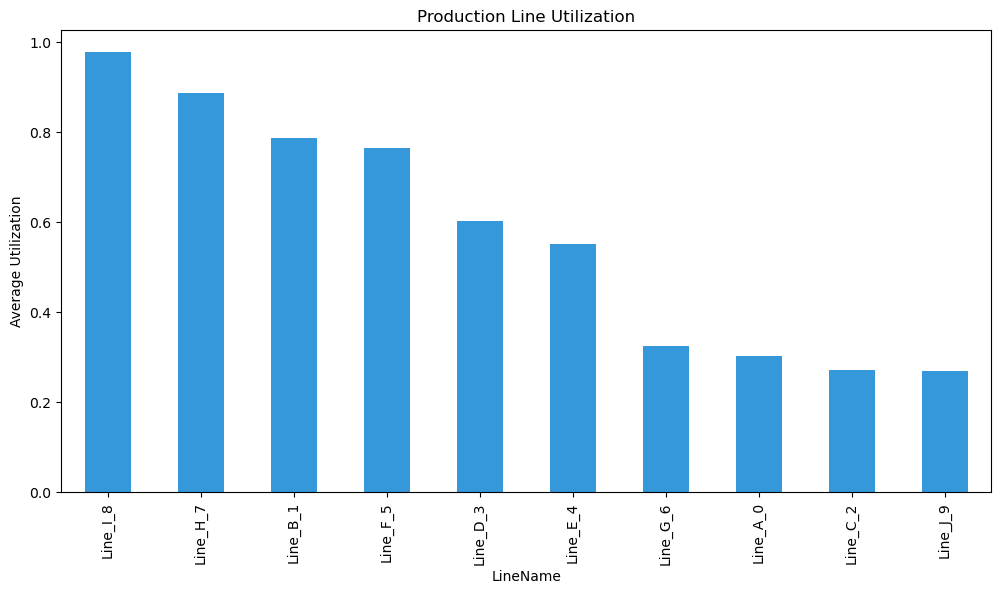

In [75]:
#Which production lines are operating at or near capacity?
# Calculate production line utilization (BatchSize / MaxCapacity)
production_products['Utilization'] = production_products['BatchSize'] / production_products['MaxCapacity']

# Identify production lines operating near or at capacity
high_utilization_lines = production_products[production_products['Utilization'] > 0.9]
print("Production Lines Operating Near Capacity:\n", high_utilization_lines[['LineName', 'Utilization']])

# Average utilization by production line
average_utilization = production_products.groupby('LineName')['Utilization'].mean().sort_values(ascending=False)
print("Average Utilization by Production Line:\n", average_utilization)

# Plot utilization by line
average_utilization.plot(kind='bar', figsize=(12, 6), title='Production Line Utilization', ylabel='Average Utilization', color="#3498db")
plt.show()


         ProductCategory  BasePrice  UnitCost  Difference
0                  Juice    3878.68   1355.46     2523.22
1                 Coffee    3036.79   1305.47     1731.32
2  Carbonated Soft Drink    1692.91   1285.63      407.28
3                    Tea    2430.50   1031.13     1399.37
4           Energy Drink    2517.38   1014.14     1503.24
5                  Water     520.74    525.44       -4.70


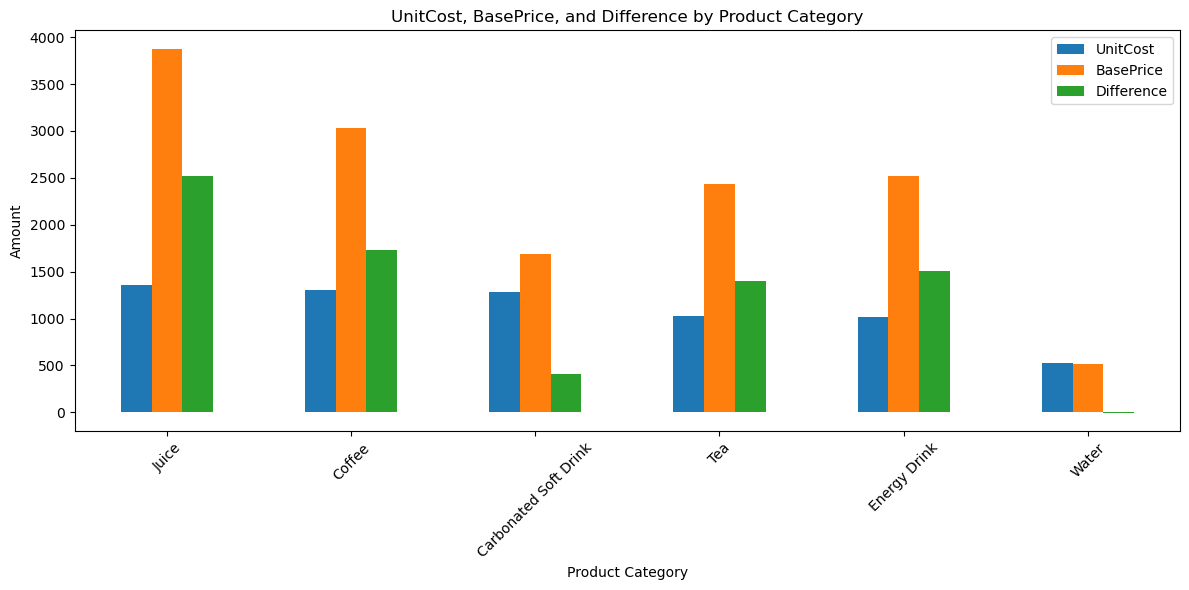

In [76]:
#Are there inefficiencies in production costs (e.g., high UnitCost for specific products)?
cost_price = pd.pivot_table(
    production_products,
    values=['UnitCost', 'BasePrice'],
    index='ProductCategory',
    aggfunc='sum'
).reset_index()

cost_price = cost_price.sort_values(by="UnitCost", ascending=False).reset_index(drop=True)
cost_price['Difference'] = cost_price['BasePrice'] - cost_price['UnitCost']
print(cost_price)
cost_price.plot(
    x='ProductCategory', 
    y=['UnitCost', 'BasePrice', 'Difference'], 
    kind='bar', 
    figsize=(12, 6),
    title='UnitCost, BasePrice, and Difference by Product Category'
)

plt.xlabel('Product Category')
plt.ylabel('Amount')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

Average Production Lead Time by Product:
 ProductName
Collection Wear        -42.196585
Discuss Them           -38.541718
Under Dog              -37.067398
Vote Term              -35.467155
Success Get            -27.694473
Sense Fill             -25.725353
Energy Teacher         -24.722705
Born Near              -22.958974
Old Tell               -18.812042
Sign Ability           -15.708321
Think Decide           -13.874403
Compare Ground         -10.476978
New Occur              -10.071603
Watch Could             -9.106688
Purpose Enter           -2.657059
Pick Image              -2.428679
Gun Rate                 3.775500
Daughter Drop            5.459482
Attorney Cover           6.132294
Stand Property           8.471434
Collection Religious    12.246748
Party Great             12.326108
Culture Guess           21.812552
Cut Then                27.244898
Information Democrat    76.311430
Name: LeadTime, dtype: float64


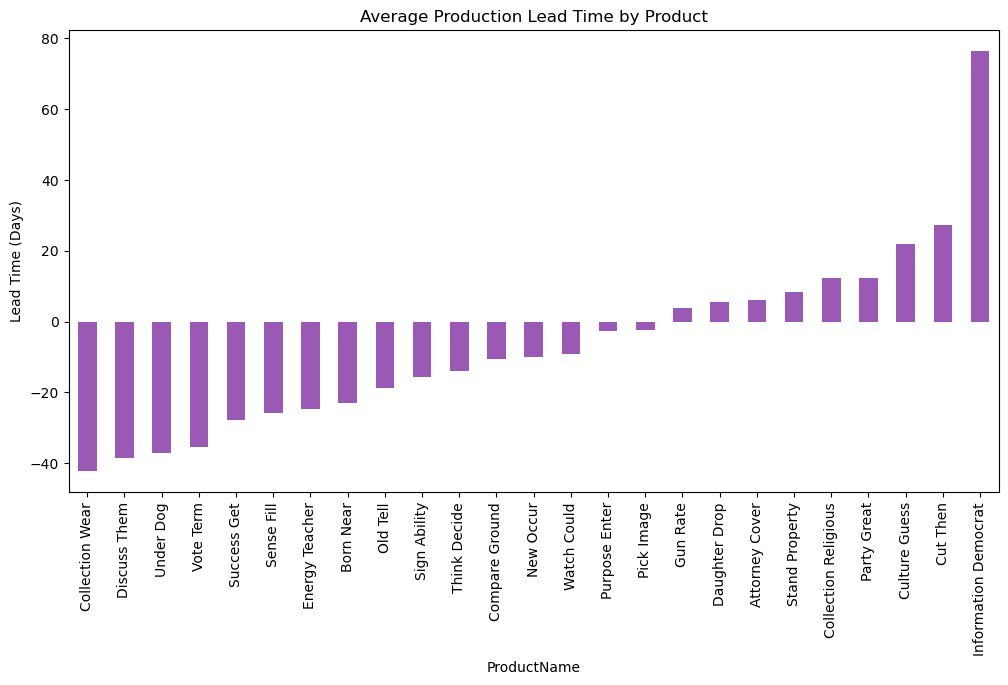

In [77]:
#What is the average production lead time for each product?

# Calculate lead time (Assume 'ProductionDate' and 'OrderDate' columns exist)
porder['ProductionDate'] = pd.to_datetime(porder['ProductionDate'])
sales['OrderDate'] = pd.to_datetime(sales['OrderDate'])

# Merge production and sales data to calculate lead time
sales_productions = sales.merge(porder, on='ProductID', how='inner')
sales_production = sales_productions.merge(product, on='ProductID', how='left')
sales_production['LeadTime'] = (sales_production['ProductionDate'] - sales_production['OrderDate']).dt.days

# Average lead time by product
average_lead_time = sales_production.groupby('ProductName')['LeadTime'].mean().sort_values()
print("Average Production Lead Time by Product:\n", average_lead_time)

# Plot lead time
average_lead_time.plot(kind='bar', figsize=(12, 6), title='Average Production Lead Time by Product', ylabel='Lead Time (Days)', color="#9b59b6")
plt.show()


Underutilized Production Lines:
       LineName  Utilization
0     Line_A_0     0.067022
1     Line_J_9     0.185253
4     Line_G_6     0.179640
5     Line_G_6     0.393153
6     Line_J_9     0.045394
...        ...          ...
4994  Line_A_0     0.360142
4995  Line_F_5     0.395377
4997  Line_A_0     0.266598
4998  Line_A_0     0.168471
4999  Line_I_8     0.369195

[2790 rows x 2 columns]
Average Underutilization by Production Line:
 LineName
Line_J_9    0.270307
Line_C_2    0.272844
Line_A_0    0.302337
Line_G_6    0.324160
Line_E_4    0.552341
Line_D_3    0.602312
Line_F_5    0.764552
Line_B_1    0.788494
Line_H_7    0.887408
Line_I_8    0.978280
Name: Utilization, dtype: float64


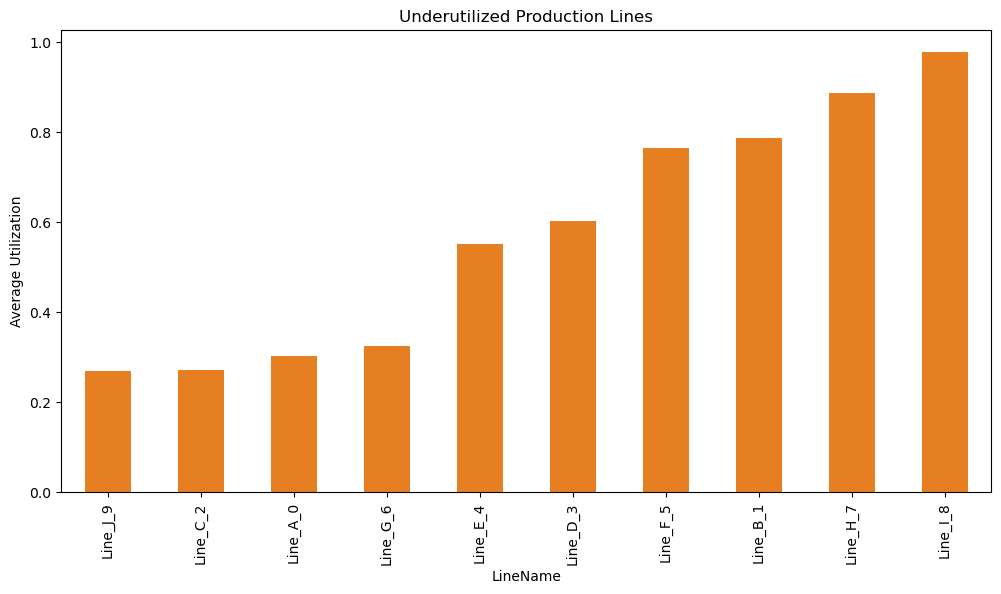

In [78]:
#Are There Specific Production Lines with High Downtime or Underutilization?
# Downtime can be derived if we have planned and actual operational hours or similar metrics
# For this example, we use low utilization to infer underutilization
underutilized_lines = production_products[production_products['Utilization'] < 0.5]
print("Underutilized Production Lines:\n", underutilized_lines[['LineName', 'Utilization']])

# Average underutilization by line
average_underutilization = production_products.groupby('LineName')['Utilization'].mean().sort_values()
print("Average Underutilization by Production Line:\n", average_underutilization)

# Plot underutilized lines
average_underutilization.plot(kind='bar', figsize=(12, 6), title='Underutilized Production Lines', ylabel='Average Utilization', color="#e67e22")
plt.show()


Production Lines with Significant Variances:
       LineName  Variance
0     Line_A_0     16287
1     Line_J_9     16387
2     Line_A_0      7982
4     Line_G_6     13490
5     Line_G_6      9979
...        ...       ...
4994  Line_A_0     11170
4995  Line_F_5      4421
4997  Line_A_0     12803
4998  Line_A_0     14516
4999  Line_I_8      3518

[4129 rows x 2 columns]


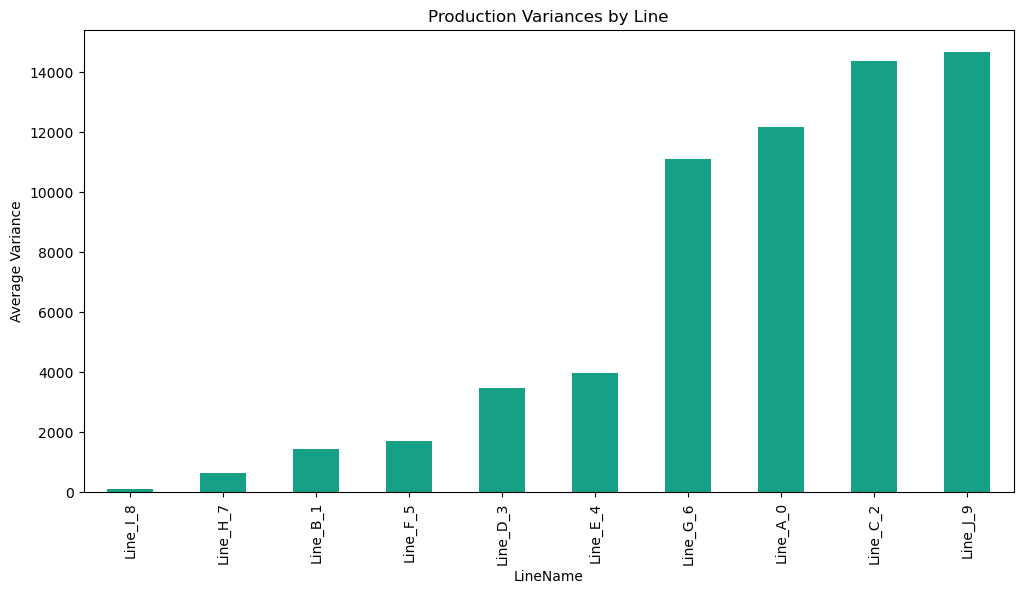

In [79]:
#What is the average production lead time for each product?
# Calculate variance between planned (MaxCapacity) and actual output (BatchSize)
production_products['Variance'] = production_products['MaxCapacity'] - production_products['BatchSize']

# Count occurrences of significant variances (e.g., variance > 20% of MaxCapacity)
significant_variance = production_products[abs(production_products['Variance']) > 0.2 * production_products['MaxCapacity']]
print("Production Lines with Significant Variances:\n", significant_variance[['LineName', 'Variance']])

# Plot variances by production line
variance_by_line = production_products.groupby('LineName')['Variance'].mean().sort_values()
variance_by_line.plot(kind='bar', figsize=(12, 6), title='Production Variances by Line', ylabel='Average Variance', color="#16a085")
plt.show()


### 6. Supplier Analysis
* How are suppliers distributed across different countries and cities?
* What are the most common payment terms among suppliers?
* How do payment terms vary by region or country?

Number of Suppliers by Country:
 SupplierCountry
India           13
UK              11
Brazil           9
Singapore        9
Spain            8
Canada           7
Italy            7
China            6
Australia        5
Mexico           5
South Africa     5
USA              5
France           4
Japan            4
Germany          2
dtype: int64


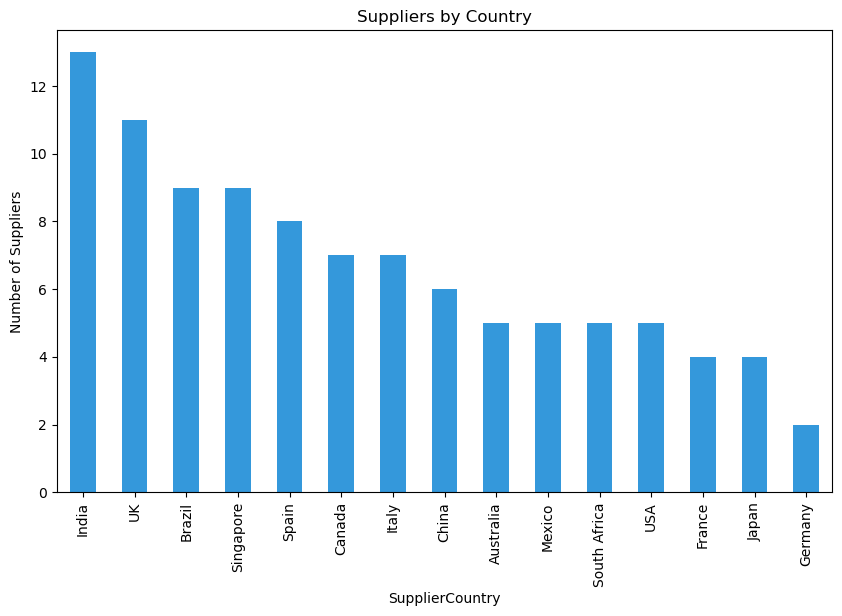

In [81]:
#How are suppliers distributed across different countries?

# Count suppliers by country
suppliers_by_country = supplier.groupby('SupplierCountry').size().sort_values(ascending=False)
print("Number of Suppliers by Country:\n", suppliers_by_country)

# Visualize supplier distribution by country
suppliers_by_country.plot(kind='bar', figsize=(10, 6), title='Suppliers by Country', ylabel='Number of Suppliers', color="#3498db")
plt.show()

Payment Terms Distribution of Suppliers :
 PaymentTerms
COD      30
NET15    20
NET45    18
NET30    16
EOM      16
Name: count, dtype: int64


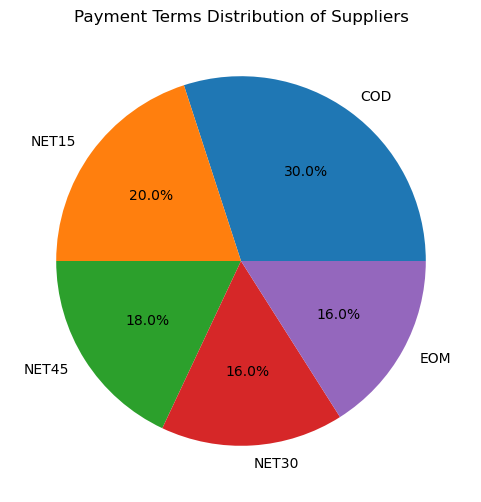

In [82]:
#What are the most common payment terms among suppliers?

# Count suppliers by payment terms
payment_terms_distribution = supplier['PaymentTerms'].value_counts()
print("Payment Terms Distribution of Suppliers :\n", payment_terms_distribution)

# Visualize payment terms distribution
payment_terms_distribution.plot(kind='pie', figsize=(6, 6), autopct='%1.1f%%', title='Payment Terms Distribution of Suppliers')
plt.ylabel('')
plt.show()

Supplier Summary Table:
 PaymentTerms     COD  EOM  NET15  NET30  NET45
SupplierCountry                               
Australia          1    1      0      1      2
Brazil             3    2      0      2      2
Canada             3    0      0      1      3
China              0    2      1      2      1
France             1    0      2      1      0
Germany            1    0      0      1      0
India              5    2      3      2      1
Italy              1    0      3      1      2
Japan              1    0      1      2      0
Mexico             3    1      0      0      1
Singapore          3    1      3      0      2
South Africa       1    1      1      2      0
Spain              2    3      3      0      0
UK                 3    1      3      1      3
USA                2    2      0      0      1


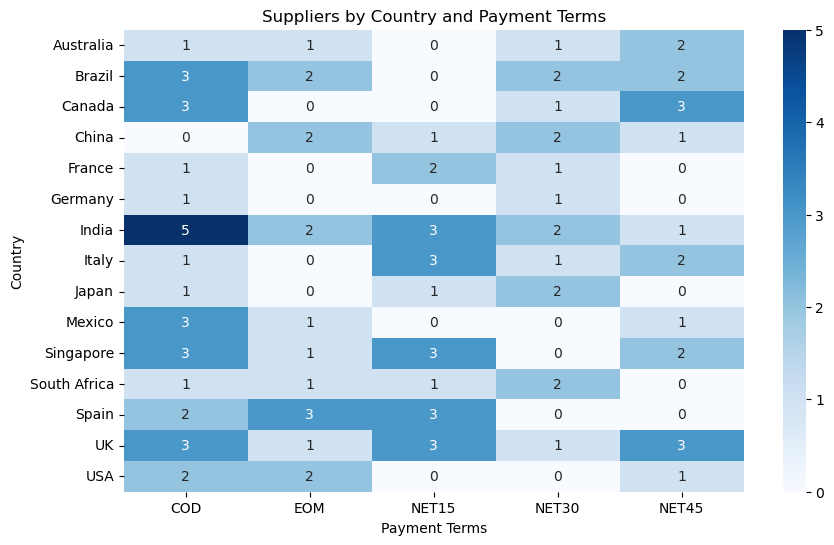

In [83]:
#How do payment terms vary by region or country?

# Summary table by country and payment terms
supplier_summary = supplier.groupby(['SupplierCountry', 'PaymentTerms']).size().unstack(fill_value=0)
print("Supplier Summary Table:\n", supplier_summary)

# Heatmap for supplier distribution by country and payment terms
plt.figure(figsize=(10, 6))
sns.heatmap(supplier_summary, annot=True, cmap='Blues', fmt='d')
plt.title('Suppliers by Country and Payment Terms')
plt.ylabel('Country')
plt.xlabel('Payment Terms')
plt.show()

### 7. Warehouse and Logistics
* Which warehouses experience the highest levels of throughput (inbound and outbound)?
* What is the relationship between warehouse location and delivery times to customers?
* Are warehouse capacities optimally utilized, or is there space inefficiency?
* How do inventory holding costs vary across warehouses?
* Are there opportunities to consolidate shipments or optimize transportation routes?

Warehouse Throughput:
                  Inbound    Outbound  TotalThroughput
WarehouseID                                          
5010         10607101547  2599821170      13206922717
5008         10507802913  2650156897      13157959810
5004         10411417895  2588042462      12999460357
5015         10370735109  2610971533      12981706642
5013         10296398304  2635315889      12931714193
5001         10150087002  2573324521      12723411523
5002         10053538126  2604625639      12658163765
5005         10017610500  2521209179      12538819679
5009          9913399758  2591309227      12504708985
5011          9803431985  2512346989      12315778974
5006          9745244025  2555053827      12300297852
5012          9769103636  2517904297      12287007933
5007          9730518623  2501588076      12232106699
5014          9535875630  2473541992      12009417622
5003          9308660102  2415225321      11723885423


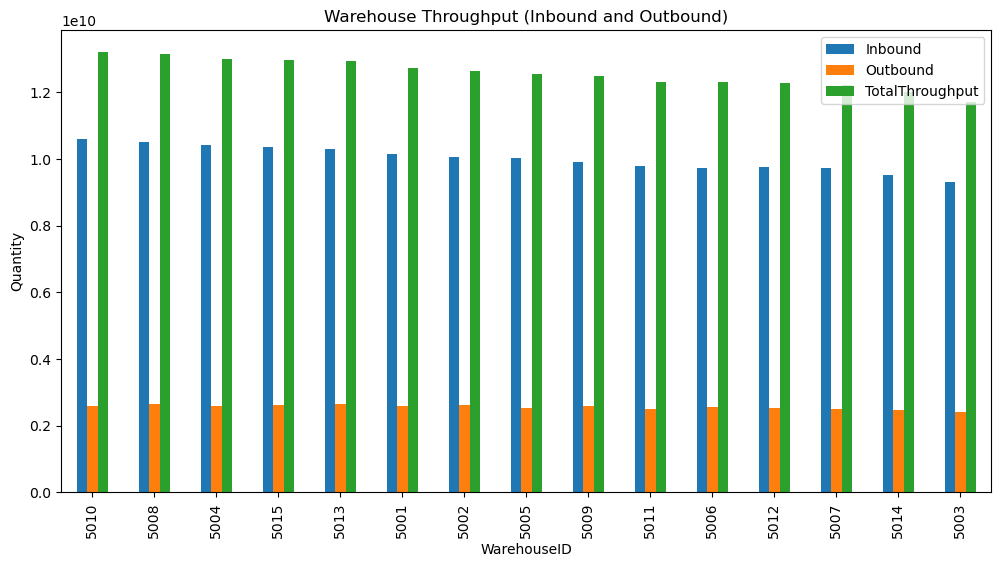

In [85]:
#Which warehouses experience the highest levels of throughput (inbound and outbound)?
# Calculate inbound and outbound activity
# Assuming 'OnHand' represents inbound and 'Quantity' in sales represents outbound
warehouse_throughput = inventory.merge(sales, on='ProductID', how='left') \
                                .groupby('WarehouseID').agg({
                                    'OnHand': 'sum',       # Inbound activity
                                    'Quantity': 'sum'      # Outbound activity
                                }).rename(columns={'OnHand': 'Inbound', 'Quantity': 'Outbound'})

# Add total throughput
warehouse_throughput['TotalThroughput'] = warehouse_throughput['Inbound'] + warehouse_throughput['Outbound']
warehouse_throughput = warehouse_throughput.sort_values(by='TotalThroughput' ,ascending=False)
print("Warehouse Throughput:\n", warehouse_throughput)

# Plot throughput by warehouse
warehouse_throughput.plot(kind='bar', figsize=(12, 6), title='Warehouse Throughput (Inbound and Outbound)', ylabel='Quantity')
plt.show()


Warehouse Utilization:
 WarehouseID
5006    0.114445
5003    0.115607
5010    0.123310
5008    0.149085
5012    0.186144
5001    0.209872
5015    0.212560
5002    0.212707
5013    0.227028
5005    0.238177
5014    0.239215
5007    0.348161
5004    0.424707
5011    0.440648
5009    0.493643
Name: Utilization, dtype: float64


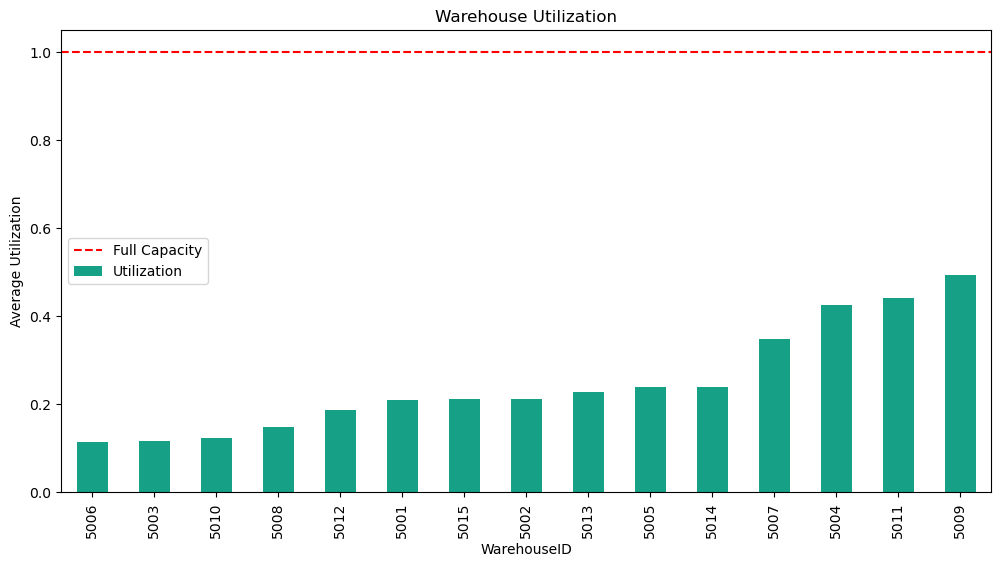

In [86]:
#Are warehouse capacities optimally utilized, or is there space inefficiency?

# Calculate utilization (OnHand / Capacity)
inventory_product_warehouse['Utilization'] = inventory_product_warehouse['OnHand'] / inventory_product_warehouse['Capacity']

# Average utilization by warehouse
warehouse_utilization = inventory_product_warehouse.groupby('WarehouseID')['Utilization'].mean().sort_values()
print("Warehouse Utilization:\n", warehouse_utilization)

# Plot warehouse utilization
warehouse_utilization.plot(kind='bar', figsize=(12, 6), title='Warehouse Utilization', ylabel='Average Utilization', color="#16a085")
plt.axhline(y=1.0, color='r', linestyle='--', label='Full Capacity')
plt.legend()
plt.show()


Inventory Holding Costs by Warehouse:
 WarehouseID
5008    2966806.086
5015    2929730.092
5004    2919552.544
5010    2895061.138
5013    2877334.478
5001    2841101.985
5002    2802678.988
5011    2799015.608
5006    2759520.501
5009    2756002.524
5012    2755845.741
5005    2713151.352
5007    2701149.072
5014    2643669.523
5003    2593612.697
Name: HoldingCost, dtype: float64


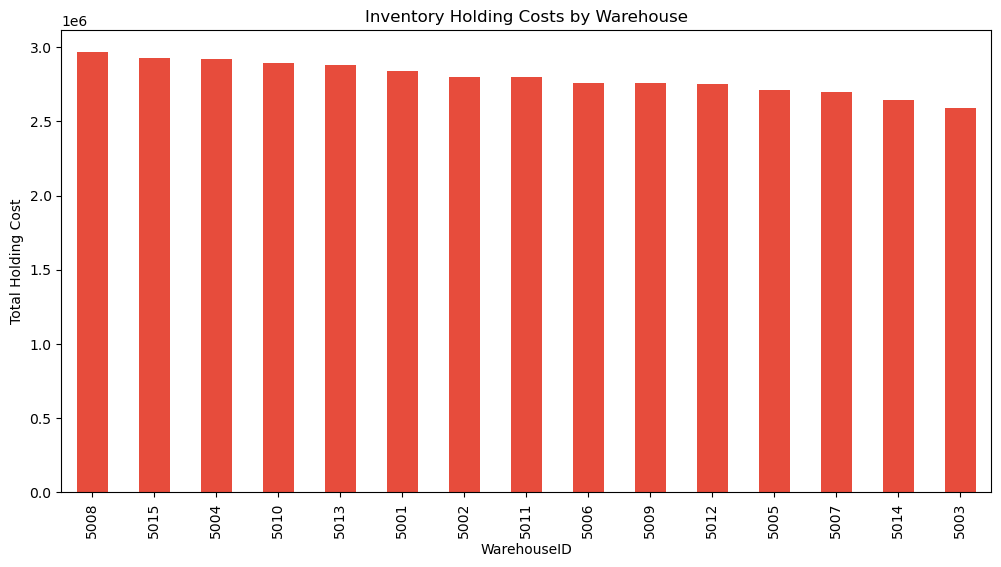

In [87]:
#How do inventory holding costs vary across warehouses?

# Calculate holding costs (Assuming 0.1 * OnHand * BasePrice as holding cost per product)
inventory_holding_costs = inventory.merge(product, on='ProductID', how='left')
inventory_holding_costs['HoldingCost'] = inventory_holding_costs['OnHand'] * 0.1 * inventory_holding_costs['BasePrice']

# Total holding cost by warehouse
holding_cost_by_warehouse = inventory_holding_costs.groupby('WarehouseID')['HoldingCost'].sum().sort_values(ascending=False)
print("Inventory Holding Costs by Warehouse:\n", holding_cost_by_warehouse)

# Plot holding costs by warehouse
holding_cost_by_warehouse.plot(kind='bar', figsize=(12, 6), title='Inventory Holding Costs by Warehouse', ylabel='Total Holding Cost', color="#e74c3c")
plt.show()


In [88]:
# Merge sales, customer, and warehouse data
sales_warehouse = sales.merge(customer, on='CustomerID', how='left') \
                       .merge(product, on='ProductID', how='left') \
                       .merge(inventory, on='ProductID', how='left') \
                       .merge(wh, on='WarehouseID', how='left')

### 8. Financial Insights

* What are the trends in production costs, and how do they affect product pricing?
* How do operating costs (e.g., production, warehousing, logistics) compare to revenue?

Trends in Production Costs:
 ProductionMonth
2023-01    6801.858693
2023-02    6328.862303
2023-03    7404.300403
2023-04    6043.781704
2023-05    7076.870897
2023-06    7387.245817
2023-07    6754.089276
2023-08    6301.996593
2023-09    6951.453793
2023-10    7046.429216
2023-11    6902.723445
2023-12    7492.121154
2024-01    7206.546288
2024-02    7324.787808
2024-03    7023.869792
2024-04    6928.256214
2024-05    6640.036824
2024-06    6951.777460
2024-07    6498.138613
2024-08    6764.926800
2024-09    6891.510159
2024-10    7248.248418
2024-11    6788.446000
2024-12    6646.873308
2025-01    7114.047462
2025-02    7062.027063
2025-03    7129.195172
2025-04    6543.591760
2025-05    6828.453116
2025-06    6908.185241
2025-07    6996.917299
2025-08    6511.615461
2025-09    6636.698194
2025-10    6938.125000
2025-11    7404.545182
2025-12    6969.697951
Freq: M, Name: TotalProductionCost, dtype: float64


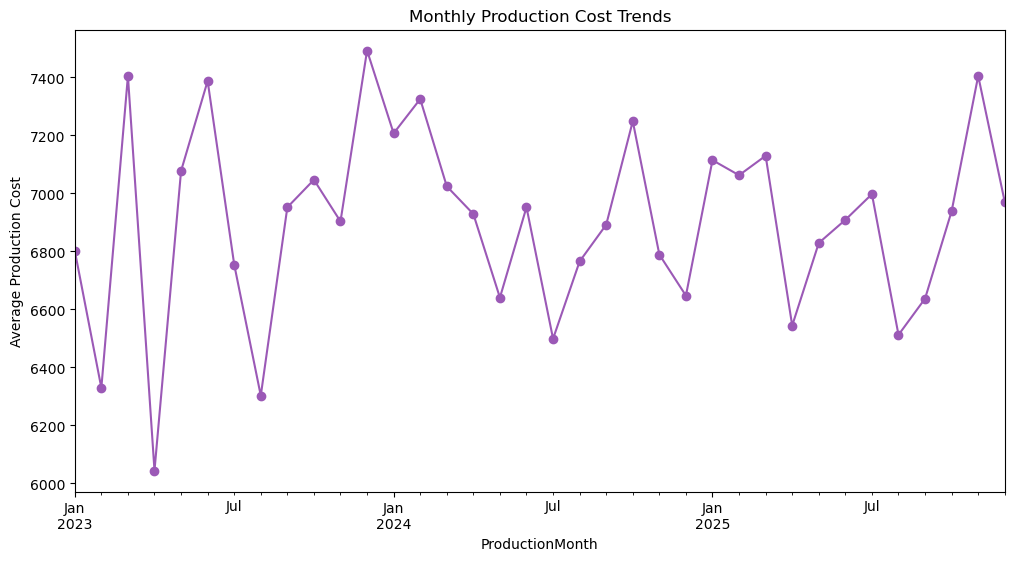

Comparison of Pricing and Production Costs:
                       BasePrice  UnitCost
ProductName                              
Think Decide               0.85  1.271045
Attorney Cover             1.06  1.341232
Cut Then                   1.10  1.294643
Compare Ground             1.22  1.393977
Collection Religious       1.31  1.335739
Energy Teacher             1.43  1.308879
New Occur                  1.74  1.313515
Stand Property             1.85  1.293850
Daughter Drop              1.87  1.289529
Pick Image                 2.05  1.280529
Sign Ability               2.13  1.287163
Discuss Them               2.56  1.293750
Under Dog                  2.91  1.364802
Gun Rate                   3.04  1.351421
Success Get                3.48  1.228098
Party Great                3.72  1.339429
Information Democrat       3.80  1.229427
Watch Could                3.81  1.276020
Purpose Enter              3.92  1.259128
Vote Term                  4.15  1.353929
Sense Fill                 4.21

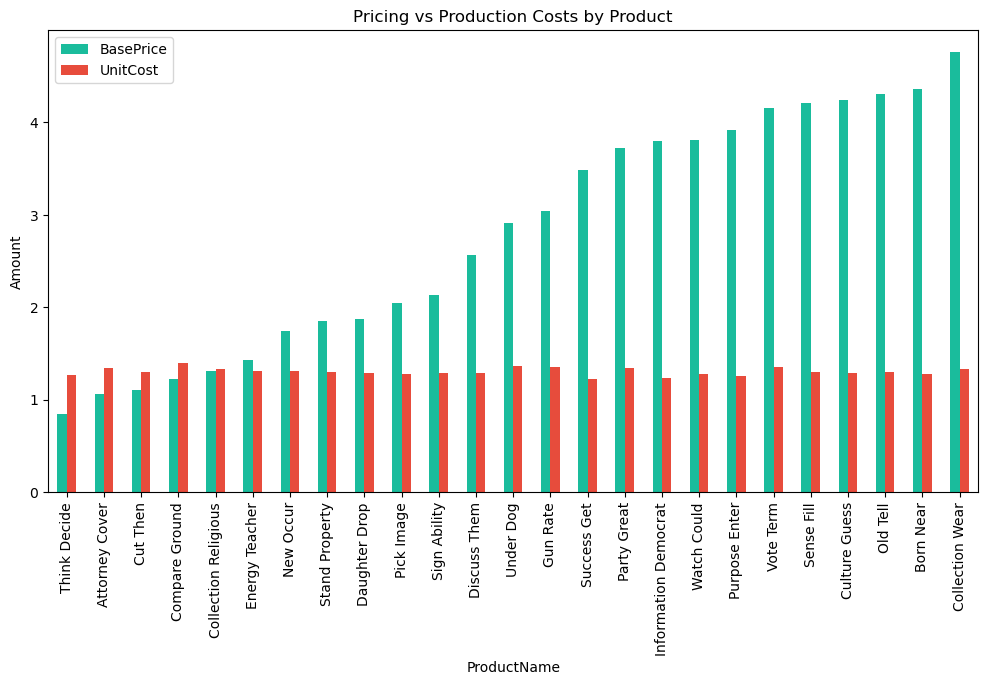

In [190]:
#What are the trends in production costs, and how do they affect product pricing?

# Merge production orders with products
production_costs = porder.merge(product, on='ProductID', how='left')

# Calculate average production cost over time
production_costs['ProductionMonth'] = pd.to_datetime(production_costs['ProductionDate']).dt.to_period('M')
monthly_production_cost = production_costs.groupby('ProductionMonth')['TotalProductionCost'].mean()
print("Trends in Production Costs:\n", monthly_production_cost)

# Plot production cost trends
monthly_production_cost.plot(kind='line', figsize=(12, 6), title='Monthly Production Cost Trends', ylabel='Average Production Cost', marker='o', color="#9b59b6")
plt.show()

# Compare production cost with pricing
pricing_vs_cost = production_costs.groupby('ProductName').agg({
    'BasePrice': 'mean',
    'UnitCost': 'mean'
}).sort_values(by='BasePrice')
print("Comparison of Pricing and Production Costs:\n", pricing_vs_cost)

# Plot pricing vs. production costs
pricing_vs_cost.plot(kind='bar', figsize=(12, 6), title='Pricing vs Production Costs by Product', ylabel='Amount', color=["#1abc9c", "#e74c3c"])
plt.show()


Total Operating Costs and Revenue:
 {'ProductionCost': 34523300.22, 'WarehousingCost': 41954232.329, 'Revenue': 210251336.52999997}


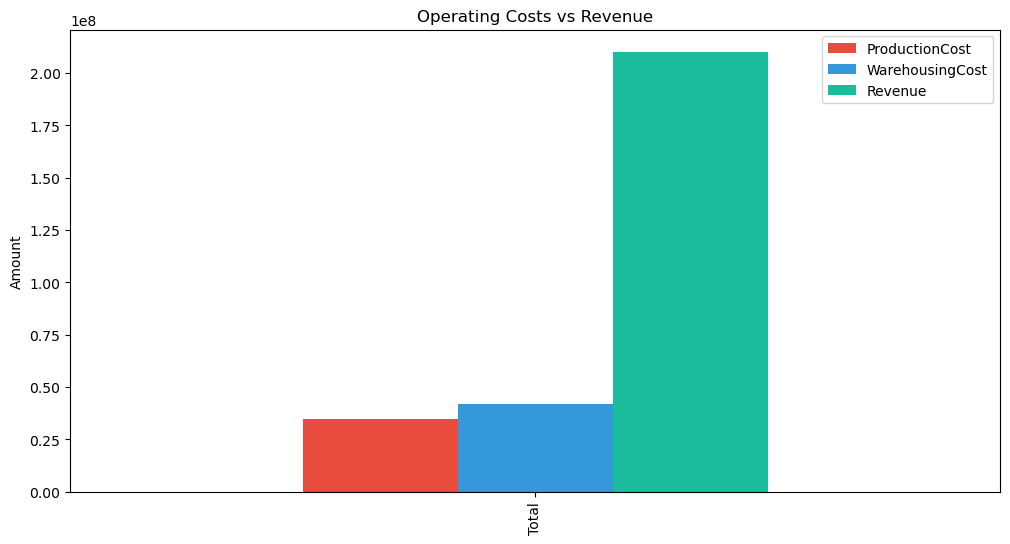

In [91]:
#How do operating costs (e.g., production, warehousing, logistics) compare to revenue?
# Merge all data to calculate operating costs
warehouse_costs = inventory.merge(product, on='ProductID', how='left')
warehouse_costs['HoldingCost'] = warehouse_costs['OnHand'] * 0.1 * warehouse_costs['BasePrice']

# Calculate total operating costs
total_operating_costs = {
    'ProductionCost': production_costs['TotalProductionCost'].sum(),
    'WarehousingCost': warehouse_costs['HoldingCost'].sum(),
    'Revenue': sales['TotalAmount'].sum()
}
print("Total Operating Costs and Revenue:\n", total_operating_costs)

# Plot operating costs vs revenue
pd.DataFrame(total_operating_costs, index=['Total']).plot(kind='bar', figsize=(12, 6), title='Operating Costs vs Revenue', ylabel='Amount', color=["#e74c3c", "#3498db", "#1abc9c"])
plt.show()


### 10. Risk Management
* What are the risks of stockouts or overstock situations for critical products?
* What is the financial impact of production or supply chain disruptions?
* How sensitive is the business to changes in input costs or sales prices?

Products at Risk of Overstock:
     ProductID   OnHand           ProductName        ProductCategory  \
3        1004  1543698         Daughter Drop                 Coffee   
17       1018  1376019            Sense Fill                  Juice   
22       1023  1315467  Information Democrat                    Tea   
7        1008  1297488           Success Get                 Coffee   
8        1009  1260159           Party Great           Energy Drink   
1        1002  1257277             Born Near           Energy Drink   
10       1011  1247881  Collection Religious  Carbonated Soft Drink   
13       1014  1211871           Watch Could                  Juice   
19       1020  1202615          Discuss Them                  Juice   
0        1001  1176725            Pick Image                 Coffee   
18       1019  1163524         Purpose Enter                  Juice   
9        1010  1103850       Collection Wear                 Coffee   
15       1016  1102137        Compare Ground 

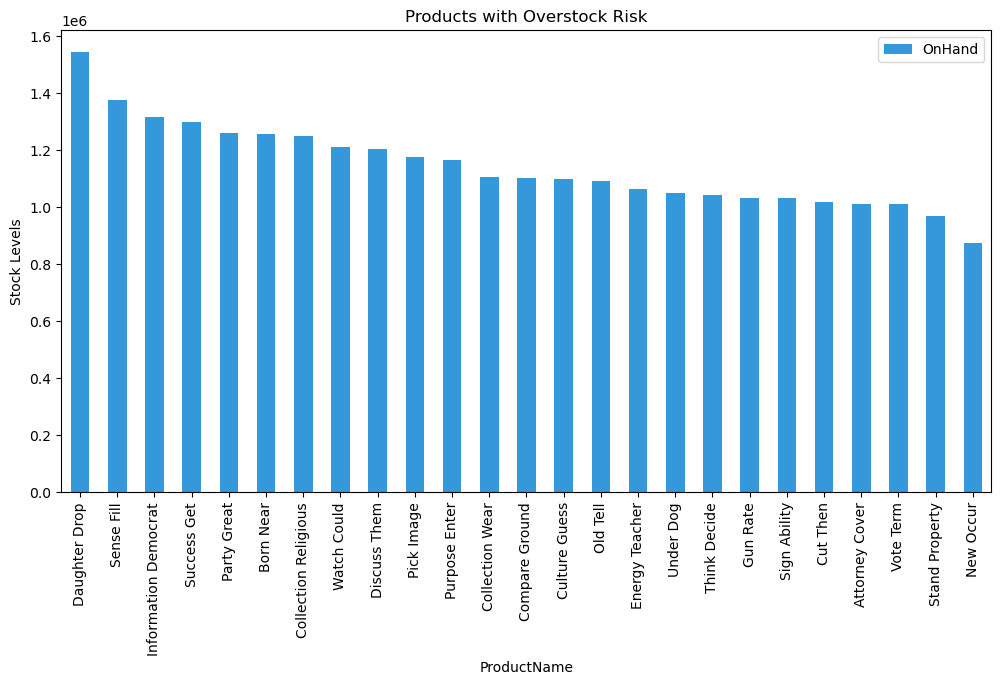

In [93]:
# Identify overstocked products (e.g., OnHand > 90th percentile)
overstock_threshold = inventory['OnHand'].quantile(0.9)
overstock_risk = inventory[inventory['OnHand'] > overstock_threshold]
overstock_summary = overstock_risk.groupby('ProductID')['OnHand'].sum().reset_index().merge(product, on='ProductID', how='left')
overstock_summary = overstock_summary.sort_values(by='OnHand' , ascending=False)
print("Products at Risk of Overstock:\n", overstock_summary)

# Plot products with overstock risk
overstock_summary.plot(x='ProductName', y='OnHand', kind='bar', figsize=(12, 6), title='Products with Overstock Risk', ylabel='Stock Levels', color="#3498db")
plt.show()


In [94]:
# Assuming production cost data is available
total_revenue = sales['TotalAmount'].sum()
total_production_cost = porder['TotalProductionCost'].sum()

# Simulate revenue loss for a 10% production disruption
disruption_impact = total_revenue - (total_revenue * 0.1)
print(f"Revenue After 10% Production Disruption: ${disruption_impact}")
print(f"Revenue Loss Due to Disruption: ${total_revenue - disruption_impact}")


Revenue After 10% Production Disruption: $189226202.87699997
Revenue Loss Due to Disruption: $21025133.652999997


In [95]:
# Assuming delayed shipments affect revenue
shipment_delays = inventory[inventory['OnHand'] == 0]
lost_revenue = shipment_delays.merge(sales, on='ProductID', how='left')['TotalAmount'].sum()
print(f"Estimated Revenue Loss Due to Stockouts: ${lost_revenue}")

Estimated Revenue Loss Due to Stockouts: $0.0


In [96]:
# Increase production costs by 10% and calculate the impact on profit
increased_production_cost = porder['TotalProductionCost'] * 1.1
profit_impact = total_revenue - increased_production_cost.sum()
print(f"Profit After 10% Increase in Production Costs: ${profit_impact}")
print(f"Profit Reduction: ${total_revenue - profit_impact}")


Profit After 10% Increase in Production Costs: $172275706.28799996
Profit Reduction: $37975630.24200001


In [97]:
# Decrease sales price by 5% and calculate the impact on revenue
price_sensitivity = sales.copy()
price_sensitivity['ReducedPriceRevenue'] = sales['TotalAmount'] * 0.95
reduced_revenue = price_sensitivity['ReducedPriceRevenue'].sum()
print(f"Revenue After 5% Price Reduction: ${reduced_revenue}")
print(f"Revenue Loss Due to Price Reduction: ${total_revenue - reduced_revenue}")


Revenue After 5% Price Reduction: $199738769.7035
Revenue Loss Due to Price Reduction: $10512566.826499969


In [98]:
# # Scatter plot: UnitPrice vs. Quantity
# plt.figure(figsize=(12, 6))
# sns.scatterplot(data=sales, x='UnitPrice', y='Quantity', alpha=0.7, color="#16a085")
# plt.title('Pricing Impact on Sales Volume')
# plt.xlabel('Unit Price')
# plt.ylabel('Quantity Sold')
# plt.show()

# # Scatter plot: UnitPrice vs. TotalAmount
# plt.figure(figsize=(12, 6))
# sns.scatterplot(data=sales, x='UnitPrice', y='TotalAmount', alpha=0.7, color="#e67e22")
# plt.title('Pricing Impact on Revenue')
# plt.xlabel('Unit Price')
# plt.ylabel('Total Revenue')
# plt.show()


In [99]:
# # Group by ProductName and calculate total production cost

# production_sales = sales.merge(production_order_details, on='ProductID', how='left')
# production_sales.head()

In [100]:
# productioncost_vs_sales = production_sales.groupby('ProductName').agg({
#     'TotalAmount': 'sum',
#     'TotalProductionCost': 'sum',
# }).sort_values(by='TotalAmount', ascending=False)

# print(productioncost_vs_sales)
# #productioncost_vs_sales = production_sales.groupby('ProductName')['TotalProductionCost',].sum().sort_values(ascending=False)

# # Plot production costs by product
# productioncost_vs_sales.plot(kind='bar', figsize=( 15, 6), title='Production Costs and Sales by Product', ylabel='Total Production Cost')
# plt.show()

In [101]:
# # Merge sales and inventory data
# sales_inventory = sales_customer_product.merge(inventory_product_warehouse, on='ProductID', how='inner')
# print(sales_inventory.head())

In [102]:
# sales_customer_product['Quarter'] = sales_customer_product['OrderDate'].dt.quarter
# sales_customer_product['Year'] = sales_customer_product['OrderDate'].dt.year
# sales_by_quarter = sales_customer_product.groupby(['Quarter','Year'])['TotalAmount'].sum().unstack()
# sales_by_quarter.plot(kind='line', figsize=(10, 6), title='Quarterly Sales Trends')
# plt.show()

In [103]:
# # Calculate the week number and add it as a new column
# production_order_details["ProductionWeek"] = production_order_details["ProductionDate"].dt.isocalendar().week
# production_order_details["ProductionYear"] = production_order_details["ProductionDate"].dt.year


# production_trends = production_order_details.groupby(["ProductionYear",'ProductionWeek']).agg({"BatchSize":"sum"}).reset_index()

# production_trends_2023 = production_trends.loc[production_trends["ProductionYear"]==2023,:]
# production_trends_2024 = production_trends.loc[production_trends["ProductionYear"]==2024,:]
# production_trends_2025 = production_trends.loc[production_trends["ProductionYear"]==2025,:]

# print(production_trends_2023["BatchSize"].std())
# print(production_trends_2024["BatchSize"].std())
# print(production_trends_2025["BatchSize"].std())

# # # Plot the production trends
# plt.figure(figsize=(15,5))
# plt.plot(production_trends_2023["ProductionWeek"],production_trends_2023["BatchSize"],label="2023")
# plt.plot(production_trends_2024["ProductionWeek"],production_trends_2024["BatchSize"],label="2024")
# plt.plot(production_trends_2025["ProductionWeek"],production_trends_2025["BatchSize"],label="2025")
# plt.legend()
# plt.grid(True)
# plt.xticks(range(1,53,2))
# plt.xlabel("Week")
# plt.ylabel("BatchSize")
# plt.show()

In [104]:
# grouped_by = sales_customer_product.groupby(["SaleYear","ProductCategory"])["TotalAmount"].sum().reset_index()
# grouped_by = grouped_by.sort_values(by=["SaleYear","TotalAmount"],ascending=False)
# print(grouped_by)

In [105]:
# palette = [ "#014182", "#247afd" ,"#82cafc", "#fffd78" ,"#fddc5c", "#fec615"]

# # "#ffffb6" ,color= "#247afd","#0d75f8"
# # Create the figure and plot

# plt.figure(figsize=(12, 6))
# sns.barplot(
#     data=grouped_by,
#     x="SaleYear",
#     y="TotalAmount",
#     hue="ProductCategory",
#     palette=palette
# )

# # Add chart labels and title
# plt.title("Sales by Category for Each Year", fontsize=16)
# plt.xlabel("Year", fontsize=14)
# plt.ylabel("Total Sales Amount", fontsize=14)
# plt.legend(title="Product Category", fontsize=12)
# plt.xticks(rotation=45, fontsize=12)
# plt.tight_layout()

# # Display the chart
# plt.show()
